#Data Exploratory Analisys:

The purpose of this notebook is documenting the second phase of the Exploratory Data Analisys (EDA) that we have worked on the database provided by PlacetoPay. 

This is the 5th notebook, since in the past notebooks we:
1. Load the database using different technologies.
2. Adjust the database using only thee columns that had relevant information
3. Clean de database from null values, typos and check for anomalies and misinformation and missed information.
4. Conduct an exploratory data analisys of the variables and the sape of the database. 

In those past steps we figured out some trends that we are going to investigate further here.

The main tasks conducted in this notebook are:
* Plot variables in a way so as to maximize our natural pattern-recognition abilities
* uncover underlying structure;
* extract important variables;
* detect outliers and anomalies;
* Correlation Matrix for numerical variables








## Load database

In [ ]:
#REquired libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# To load a file into colab:
import io
import os
from datetime import datetime

# For the plots:
import matplotlib.pyplot       as plt
import seaborn                 as sns
import plotly.express as px
import plotly.graph_objs as go
import time

In [ ]:
#!pip install dovpanda
#import dovpanda

In [ ]:
# Making lists of columns for further use:

HashedCols = ['transaction_payer_id', 'card_id']

DateCols = ['transaction_processing_date_', 'merchant_created']

IntCols = ['transaction_processing_hour', 'transaction_card_installments']

FloatCols = ['transaction_processing_amount']

CategoricalCols = ['transaction_request_language', 'transaction_response_code',
                   'transaction_card_issuer_name', 'transaction_card_type', 
                   'transaction_payer_document_type', 
                   'paymentmethod_franchise',  'paymentmethod_name', 'paymentmethod_type',
                   'ip_location_region_name', 'ip_location_city', 
                   'card_class', 'card_country', 
                   'merchant_id', 'merchant_enabled', 
                   'merchant_address_city', 'merchant_classification', 
                   'isic_division_name', 'isic_section_name',
                   'site_category', 'site_id', 'site_channel']

All_cols = HashedCols + FloatCols + DateCols + IntCols + CategoricalCols + [
                'transaction_user_agent', 'transaction_id', 'transaction_description']
len(All_cols)

31

### Pickle Files into Jupyter


In [ ]:
%%time
# To save as Pickle format:
bdf.to_pickle("./placetopayDB3_pickle")

In [ ]:
%%time
#And then when you need to restart your notebook you can simply read directly from pickle:
bd = pd.read_pickle("./placetopayDB3_pickle")
# If the file is very large the pickle file will be compressed with the parameter compression = 'gzip'.

### Pickle files into Google Drive:

In [ ]:
from google.colab import drive
import pickle
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%time
DATA_PATH = "/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/placetopayDB4_pickle"
infile = open(DATA_PATH,'rb')
bd = pickle.load(infile)
bd.shape

CPU times: user 6.99 s, sys: 1.99 s, total: 8.97 s
Wall time: 10.3 s


### CSV into jupyter from local folder:

In [ ]:
cd ../Inferencia y recomendacion - EGM

/home/jovyan/work/PROJECT/Inferencia y recomendacion - EGM


In [ ]:
ls

 1-Documentos/                   'Copy of Team67_Project_Week5.ipynb'
'2-Deliverable Documents Sent'/   EDA.ipynb
'3- EDA Notebooks'/               merchants.csv
'4-Similarity Matrix'/            merchants.gsheet
'Base Limpia .ipynb'              payers.csv
 bdfn.csv                         payers.gsheet
 bdfnv2.csv                       placetopayDB3.ftr
'Borrador - LuisM.ipynb'          PlaceToPayEDA.html


In [ ]:
%%time
FileName = 'placetopayDB3.csv'
from csv import reader
opened_file = open(FileName) # File path if it fails it might be necessary to add encoding = "utf-8"
read_file = reader(opened_file,delimiter=',')
read_file

In [ ]:
Sample = pd.read_csv( FileName, nrows = 10) # just to check schema is as expected. Use sep=',', error_bad_lines=False, encoding='latin1', nrows = 100000

### CSV into colab from Google Drive:

In [ ]:
# Para usar Google Drive, (Solo si se ejecuta desde Google Drive):
from google.colab import drive
drive.mount('/content/drive')

# after that:
# <--- Refresh mounted Drive
# <--- Look for file and get the path link

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
FilePath = '/content/drive/My Drive/DS4A-3a/Place to pay - DS4A - Databases and Notebooks/bdfn.csv'
Sample = pd.read_csv(FilePath, nrows = 10) # just to check schema is as expected. Use sep=',', error_bad_lines=False, encoding='latin1', nrows = 100000

In [ ]:
Sample.shape

In [ ]:
%%time
# Load the database to start exploratory analysis:
#FilePath = '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/bdfn.csv'
FilePath = '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/placetopayDB4_sample.csv'

DataChunk = pd.read_csv(FilePath, chunksize=100000, sep=',', encoding='utf-8')#, usecols = All_cols) 
dfList = []
for chunk in DataChunk:
    df = pd.DataFrame(chunk)
    dfList.append(df)
    print(chunk.shape, type(chunk))
    del chunk                       # You have to liberate memory, otherwise, it will crash the kernel
bd = pd.concat(dfList,sort=False)   # You can also convert to dataframe and process inside the for loop.
del DataChunk                       # You have to liberate memory, otherwise, it will crash the kernel%%time
# Dataset is now stored in a Pandas Dataframe

(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
CPU times: user 10.3 s, sys: 947 ms, total: 11.2 s
Wall time: 16.2 s


### Feather file into Jupyter

In [ ]:
%%time
import feather
FeatherFileName = '/placetopayDB3.ftr'

# To read feather-format:
bd = pd.read_feather(FeatherFilePath + FeatherFileName, columns=None, use_threads=True)
#bd = feather.read_dataframe(FilePath) # do the same, alternatively

In [ ]:
# Load the database to start exploratory analysis:
%%time
FileName = 'placetopayDB3.csv'
ChunkSize = 10 ** 5

#https://pythonspeed.com/articles/chunking-pandas/
#for chunk in pd.read_csv(FileName, chunksize=ChunkSize):
#    process(chunk)

DataChunk = pd.read_csv(FileName, chunksize=100000, sep=',', encoding='utf-8', usecols = chosen_cols) 
dfList = []
for chunk in DataChunk:
    dfList.append(chunk)
    print(chunk.shape, type(chunk))
    del chunk                       # You have to liberate memory, otherwise, it will crash the kernel
bd = pd.concat(dfList,sort=False)   # You can also convert to dataframe and process inside the for loop.
del DataChunk                       # You have to liberate memory, otherwise, it will crash the kernel%%time
# Dataset is now stored in a Pandas Dataframe



---



---



# Introduction

This notebook is intended to summarize and explain the most important and relevant, non-obvious insights we have discovered in the dataset of Placetopay. 

The main tasks conducted in this notebook are:

    Plot variables in a way so as to maximize our natural pattern-recognition abilities
    uncover underlying structure;
    extract important variables;
    detect outliers and anomalies;

In [ ]:
# What type of payment methods do we want to include in study?
bd.paymentmethod_type.value_counts()

DEBITACCOUNT    6323677
CREDITCARD      3099349
PRIVATECARD      315443
CASH                310
E-WALLET             20
Name: paymentmethod_type, dtype: int64

In [ ]:
# Do we need to consider only approved transactions?
bd.transaction_response_code.value_counts()

APPROVED    7028504
REJECTED    2548665
FAILED       161556
PENDING          74
Name: transaction_response_code, dtype: int64

In [ ]:
bd.drop(bd[bd['transaction_response_code']!='APPROVED'].index, axis = 0, inplace=True)

In [ ]:
# Do we need to consider only approved transactions?
bd.site_category.value_counts()

Recaudo       5097102
E-Commerce    1931402
Name: site_category, dtype: int64

In [ ]:
bd.drop(bd[bd['site_category']!='Recaudo'].index, axis = 0, inplace=True)

In [ ]:
bd.shape

(5097102, 32)

# 1- Relations between variables

In this section we compute the most compprehensive statistics possible.

## Number of purchases by user

<ipython-input-63-b7f74db5062f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1["item2"][p1["item"] >= 5] = "5 o más"


Text(0.5, 0, ' ')

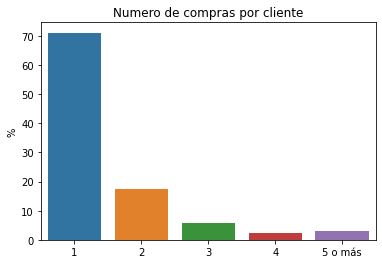

In [ ]:
#import matplotlib.pyplot       as plt
#import seaborn                 as sns
p1 = bd.groupby(by="user",as_index=False).count()
p1["item2"] = p1["item"]
p1["item2"][p1["item"] >= 5] = "5 o más"
p1 = p1.groupby(by="item2",as_index=False).count()
def pct(x):
    return(100*sum(x)/sum(p1["user"]))
sns.barplot(x="item2",y="user",data=p1,estimator=pct)
plt.title("Numero de compras por cliente")
plt.ylabel("%")
plt.xlabel(" ")


## Number of merchants by user

<ipython-input-66-7fab034abbc4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2["item2"][p2["item"] >= 3] = "3 o más"


Text(0.5, 0, ' ')

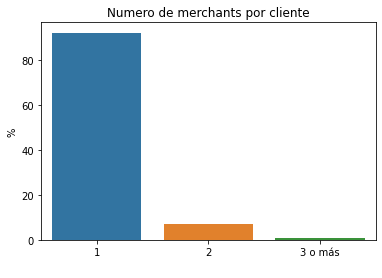

In [ ]:
p2 = bd.reset_index().groupby(by=["user","item"],as_index=False).count()
p2 = p2.groupby(by=["user"],as_index=False).count()
p2["item2"] = p2["item"]
p2["item2"][p2["item"] >= 3] = "3 o más"
p2 = p2.groupby(by="item2",as_index=False).count()
def pct(x):
    return(100*sum(x)/sum(p2["user"]))
sns.barplot(x="item2",y="user",data=p2,estimator=pct)
plt.title("Numero de merchants por cliente")
plt.ylabel("%")
plt.xlabel(" ")

## Number of users by merchant

<ipython-input-91-c846d7fa4b54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p3["user"][p3["user"] >= threshold] = threshold


Text(0.5, 0, 'Compradores')

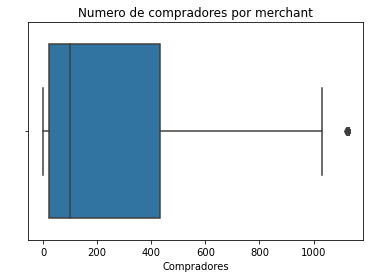

In [ ]:
p3 = bd.reset_index().groupby(by=["user","item"],as_index=False).count()
p3 = p3.groupby(by=["item"],as_index=False).count()
threshold = p3["user"].quantile(0.85)
p3["user"][p3["user"] >= threshold] = threshold
sns.boxplot("user",data=p3)
plt.title("Numero de compradores por merchant")
plt.ylabel(" ")
plt.xlabel("Compradores")

## Number of purchases per merchant

<ipython-input-92-2cf285616d4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p4["user"][p4["user"] >= threshold] = threshold


Text(0.5, 0, 'Compras')

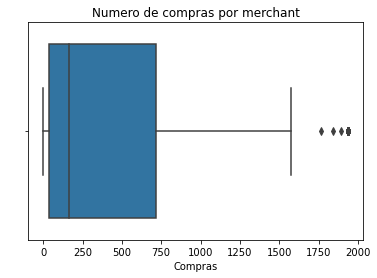

In [ ]:
p4 = bd.reset_index().groupby(by=["item"],as_index=False).count()
threshold = p4["user"].quantile(0.85)
p4["user"][p4["user"] >= threshold] = threshold
sns.boxplot("user",data=p4)
plt.title("Numero de compras por merchant")
plt.ylabel(" ")
plt.xlabel("Compras")

from these 4 plots we can foresee which will be the main problems when developing the recommendation system:

* **Mayority of users are using the platform only once**
* **Mayority of the users are coming for a single merchant**
* **A typical merchant has between 10 to 450 customers**
* **A typical merchant has between 10 to 700 sales**

 The data is very skewed and there are outliers that impact too much the distributions.
 
 Also, in previous notebooks we noticed that the data that is comming from aggregators (like a travel agency) and the transactions coming from single clients are mixed. From this plots we conclude that we have to trat differently two populations that are in the database: companies and persons.

 We eliminate the transactions coming from cards with more than 5 differen users, or users with business identities in order to have only one population under study.

 

## Concentration of purchases in merchant categories

In [ ]:
bd_merch = bd.groupby(by=["isic_section_name"],as_index=False)["transaction_payer_id"].count()
bd_merch['transaction_payer_id'] = 100*bd_merch['transaction_payer_id']/sum(bd_merch['transaction_payer_id'])
bd_merch['isic_section_name'] = bd_merch['isic_section_name'].astype(str)
bd_merch.loc[bd_merch['transaction_payer_id'] < 2, 'isic_section_name'] = 'Otros'

In [ ]:
bd_merch['transaction_payer_id'] = 100*bd_merch['transaction_payer_id']/sum(bd_merch['transaction_payer_id'])
fig = px.pie(bd2, values='transaction_payer_id', names='isic_section_name', title="Número de transacciones")
fig.update_traces(textposition='outside')
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"}
#                  uniformtext_minsize=12,
#                  uniformtext_mode='hide'
                  )
fig.show()

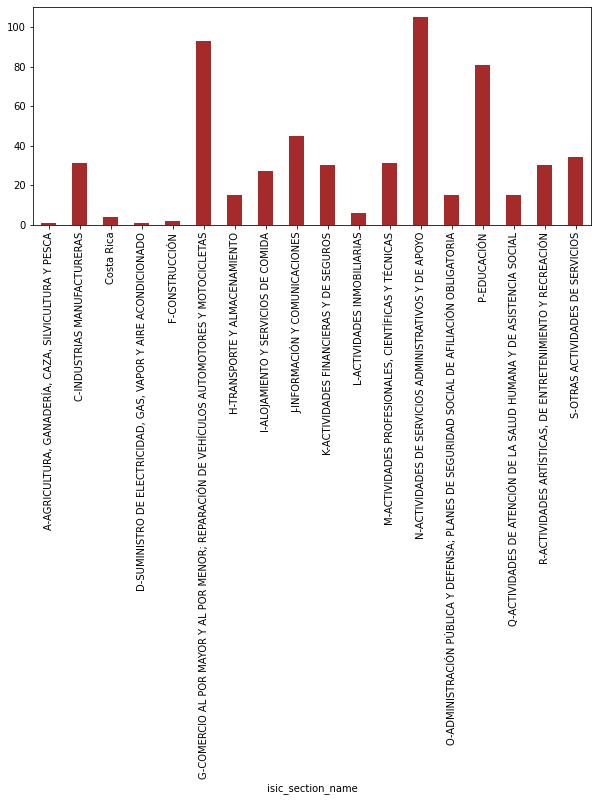

In [ ]:
# Number of merchants in each category:

bd_merch = bd.groupby(['isic_section_name', 'merchant_id']).count().reset_index()
bd_merch_isic = bd_merch.dropna().groupby('isic_section_name').count()
plt.figure(figsize=(10,4))
bd_merch_isic['merchant_id'].plot(kind = 'bar', color='brown')
plt.xticks(rotation=90)
plt.show()

In [ ]:
bd_merch2 = bd.groupby(['isic_division_name', 'merchant_id']).count().reset_index()
bd_merch_isic2 = bd_merch.dropna().groupby('isic_division_name').count()

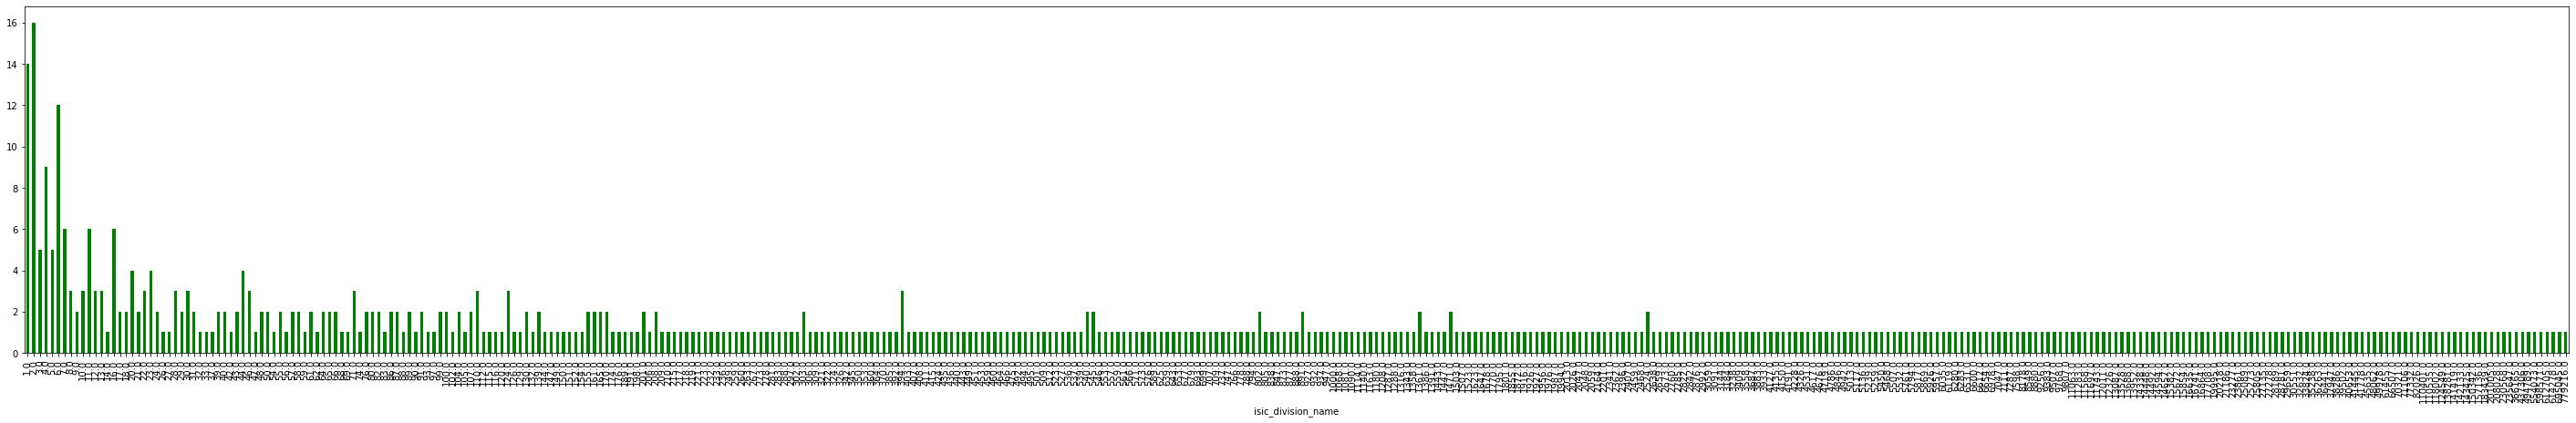

In [ ]:
plt.figure(figsize=(50,7))
bd_merch_isic2['merchant_id'].plot(kind = 'bar', color='green')
plt.xticks(rotation=90)
plt.show()

## Card Attributes

First we want to know if the statistical distribution of Card Attributes is the same plotting against the variables of interest, that is:
* How many transactions have the same type of card?
* How many cards have the same attribute?
* How much money is spent in each type of card?
* How many merchants are payed by each type of card.

In order to compare, we plot the *percentual* distributions of each attribute compared with each of this 4 variables.

The main tools for this task are calculations of covariance, dispersion graphs and crosstabs (that we use already in past notebook), Quartiles and boxplots.

<Figure size 1080x720 with 0 Axes>

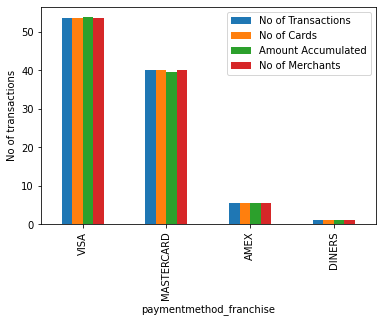

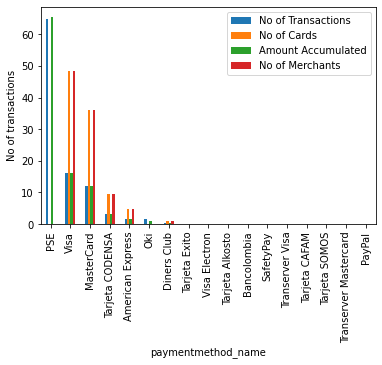

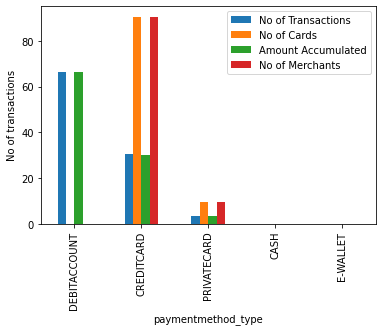

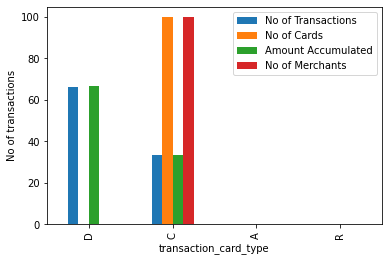

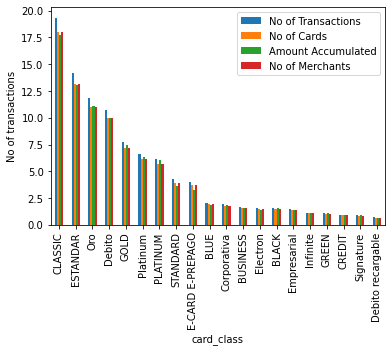

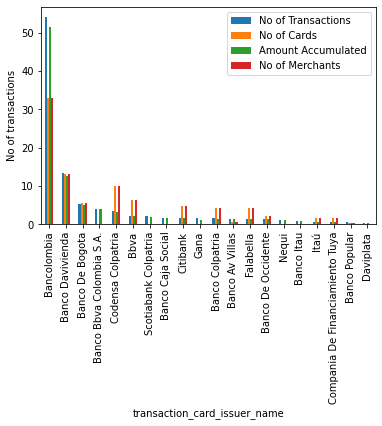

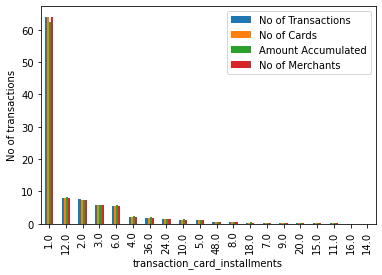

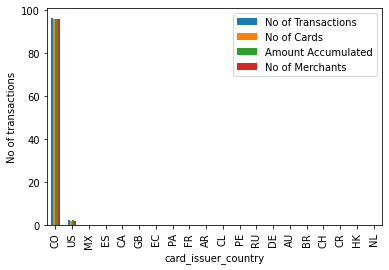

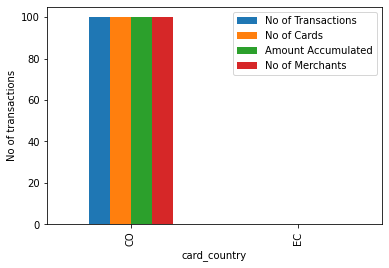

In [ ]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['paymentmethod_franchise',  'paymentmethod_name', 'paymentmethod_type',
                            'transaction_card_type', 'card_class',
                            'transaction_card_issuer_name', 'transaction_card_installments',
                            'card_issuer_country', 'card_country'
                            ]):
    SerieA = bd[column].value_counts().head(20)
    SerieB = bd[['card_id', column]].groupby(column).count().sort_values(by='card_id', ascending=False).iloc[:,0]
    SerieC = bd[['transaction_processing_amount', column]].groupby(column).sum().sort_values(by='transaction_processing_amount', ascending=False).iloc[:,0]
    SerieD = bd[['merchant_id', column, 'card_id']].groupby(['merchant_id',column]).count().reset_index().groupby(column).sum().sort_values(by='card_id', ascending=False).iloc[:,0]
    
    PlotDF = pd.DataFrame({'No of Transactions': 100*SerieA/SerieA.sum(),
                           'No of Cards': 100*SerieB/SerieB.sum(),
                           'Amount Accumulated': 100*SerieC/SerieC.sum(),
                           'No of Merchants': 100*SerieD/SerieD.sum()
                          })#.plot(kind='bar'))
    #plt.subplot(2, 3, i+1)
    #sns.distplot(bd[column], bins = 20, kde = False)#, label='No. of Transacion')
    #for Serie in PlotDF.columns:
    PlotDF.sort_values(by='No of Transactions', ascending = False, inplace = True)
    PlotDF.head(20).plot(kind='bar')

    #plt.legend()
    plt.ylabel('No of transactions')
    plt.xlabel(column)
    
plt.show()

**What do we see here?**

We expect that all the distributions were the same, that means that all the credit cards, no matter their type, country of origin or franchise, contribute independently to the amount of transactions, to the number of merchants and to the number of transactions. we see this clearly in the installment plot, country plots and franchise plot, for example.

Plotting the attributes of cards against number of **transactions (blue)**, then against **number of cards (orange)**, and then against **transaction amount accumulated (green)**, and finally against **number of merchants (red)**, we can see three interesting things:

* Most of the attributes of cards present almost the same distributions when plotted against different variables. 

* Plot 2: `paymentmethod_names` : While 50% of the cards are used with the method 'Visa', there is less than 20% of the transactions and aggregated value produced in the platform by the method 'Visa'. While there are no merchants registered payment with the method 'ṔSE', 60% of the transactions and aggregated amount are made using the method 'PSE' This inbalance is strange.

* Plots 3 y 4, `paymentmethod_type` y `transaction_card_type`: while there are more cards in type 'C' or 'CREDITCARD', there is more transactions and more value registered in 'D' or 'DEBITACCOUNT'

* Plot 5: `card_class` The cards with labels 'clasica', 'oro', 'platinum', 'black' y otros, have more transaction amount accumulated than transaction amount. This could show some kind of correlation, as we expect.

* Plot 6: `transaction_card_issuer_name` While cards issued by most of the banks have expected behavior, cards issued by 'BBVA' and 'Bancolombia' produce higher number of transactions and higher value than other banks


Besides these statements, from this we can conclude that the card attributes dont have (at this stage) an impact in the transaction amount or in the number of transactions, in general. 


This is the reason: this could be due to different ways the merchants are using the platform. We have to be certain that these variables are correclty entered in the platform and have the same meaning for all users before jump to any conclussions. 



## Transaction Installments 
¿On how many installments are people buying things?

In [ ]:
# Transaction Installments ¿On how many quotes people buy thing? (In percentage)
bd['transaction_card_installments'].value_counts()/36061.8

1.0     66.025295
12.0     7.442141
2.0      7.075548
3.0      5.361823
6.0      5.149410
4.0      2.010354
36.0     1.646424
24.0     1.220544
10.0     1.181389
5.0      1.002113
48.0     0.476432
8.0      0.374219
18.0     0.315098
7.0      0.189563
9.0      0.105652
20.0     0.096057
15.0     0.076924
11.0     0.065415
14.0     0.030919
30.0     0.030143
16.0     0.029200
13.0     0.021463
19.0     0.009206
17.0     0.007737
22.0     0.007016
25.0     0.006766
35.0     0.006544
32.0     0.005990
21.0     0.005740
26.0     0.004908
28.0     0.004215
34.0     0.004049
33.0     0.003134
23.0     0.002828
27.0     0.002607
29.0     0.001664
31.0     0.001276
60.0     0.000111
50.0     0.000028
39.0     0.000028
Name: transaction_card_installments, dtype: float64

transaction_card_installments
1.0     1361457
2.0      202220
12.0     181909
3.0      150688
6.0      138293
4.0       53711
36.0      42256
10.0      30816
24.0      27114
5.0       26086
Name: transaction_id, dtype: int64

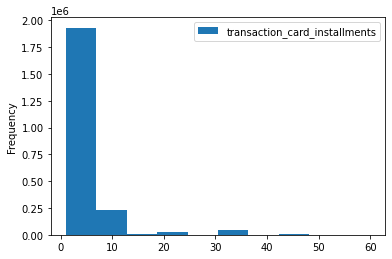

In [ ]:
# How is the distribution of the card installments people buy at, when using credit card?
display(bd.groupby(bd.transaction_card_installments)['transaction_id'].count().sort_values(ascending=False).head(10))
bd[['transaction_card_installments']].plot.hist()

In [ ]:
#CardInstallments
bd['transaction_card_installments'].value_counts().values

array([2380991,  268377,  255157,  193357,  185697,   72497,   59373,
         44015,   42603,   36138,   17181,   13495,   11363,    6836,
          3810,    3464,    2774,    2359,    1115,    1087,    1053,
           774,     332,     279,     253,     244,     236,     216,
           207,     177,     152,     146,     113,     102,      94,
            60,      46,       4,       1,       1])

In [ ]:
X1 = bd['transaction_card_installments'].value_counts().index
Y1 = bd['transaction_card_installments'].value_counts().values
fig = px.bar(bd, x = X1, y = Y1)
fig.show()

## Merchant Attributes

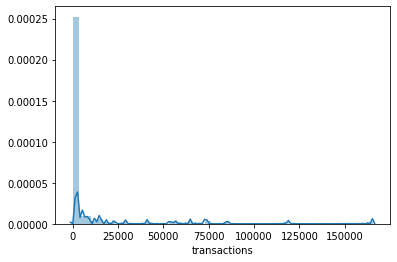

In [ ]:
# Most of the transactions are made to  relatively new merchants.

bd.merchant_created = pd.to_datetime(bd.merchant_created)
n4 = bd.merchant_created.value_counts()
n4.sort_index(inplace=True)
m = n4.index[-1]
n5 = pd.DataFrame(n4)
#n4.reset_index(inplace=True)
n5['index2'] = m-n5.index
#n4.sort_values(by='merchant_created')
n5.columns = pd.Index(['transactions','Antiguedad'])
sns.distplot(n5["transactions"])

## Logarithm of Transaction Amount

In [ ]:
# Here we will start working with a logarithmic transformation of the transaction amount.
bd_log = bd.copy()
bd_log.transaction_processing_amount = np.log(bd_log.transaction_processing_amount+1)

### Boxplot of transaction amounts

In the last part of the EDA we foresee the need of a transformation in the transaction_processing_amount variable. The reason is that the distribution is so skewed that there is nothing to see in a plot of this variable, just outliers. 

Here we inteded to see how were the distributions of transaction_amount over different business categories, but this time, in order to have a propper boxplot, the variable was transformed using a logarithmic function. 

Using this plots, we can compare the different merchant categories (Sections) and subcategories (divisions) Having in mind that every number in the y-axis represent a potence of 10 in colombian pesos. 

Text(0.5, 1.0, 'Boxplot Log(Amount) by Section')

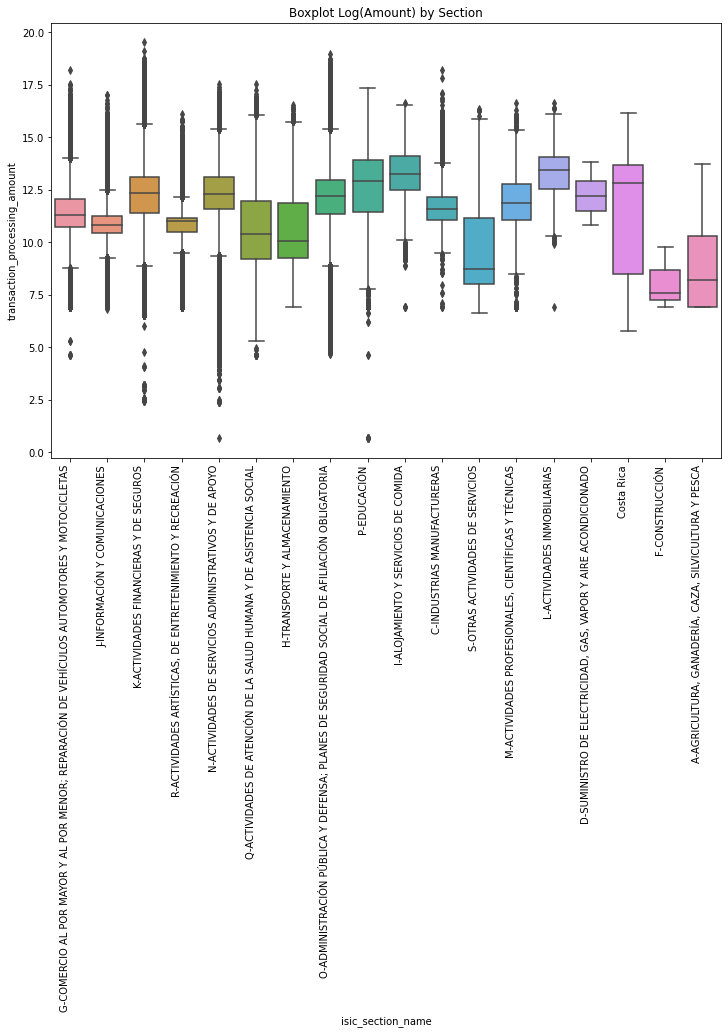

In [ ]:
plt.figure(figsize=(12,8))
fig=sns.boxplot(x="isic_section_name",y="transaction_processing_amount", data=bd_log)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Boxplot Log(Amount) by Section")

Text(0.5, 1.0, 'Boxplot Log(Amount) by Section')

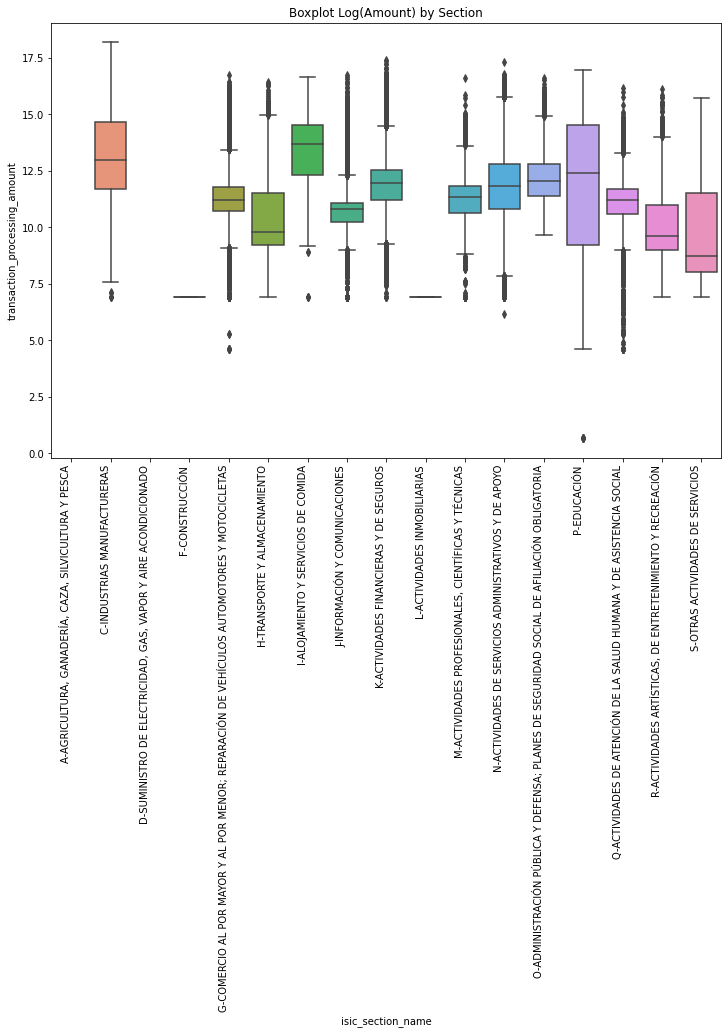

In [ ]:
#DONT RUN
# after filtering only e-commerce
plt.figure(figsize=(12,8))
fig=sns.boxplot(x="isic_section_name",y="transaction_processing_amount", data=bd_log)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Boxplot Log(Amount) by Section")

Text(0.5, 1.0, 'Boxplot Log(Amount) by Division')

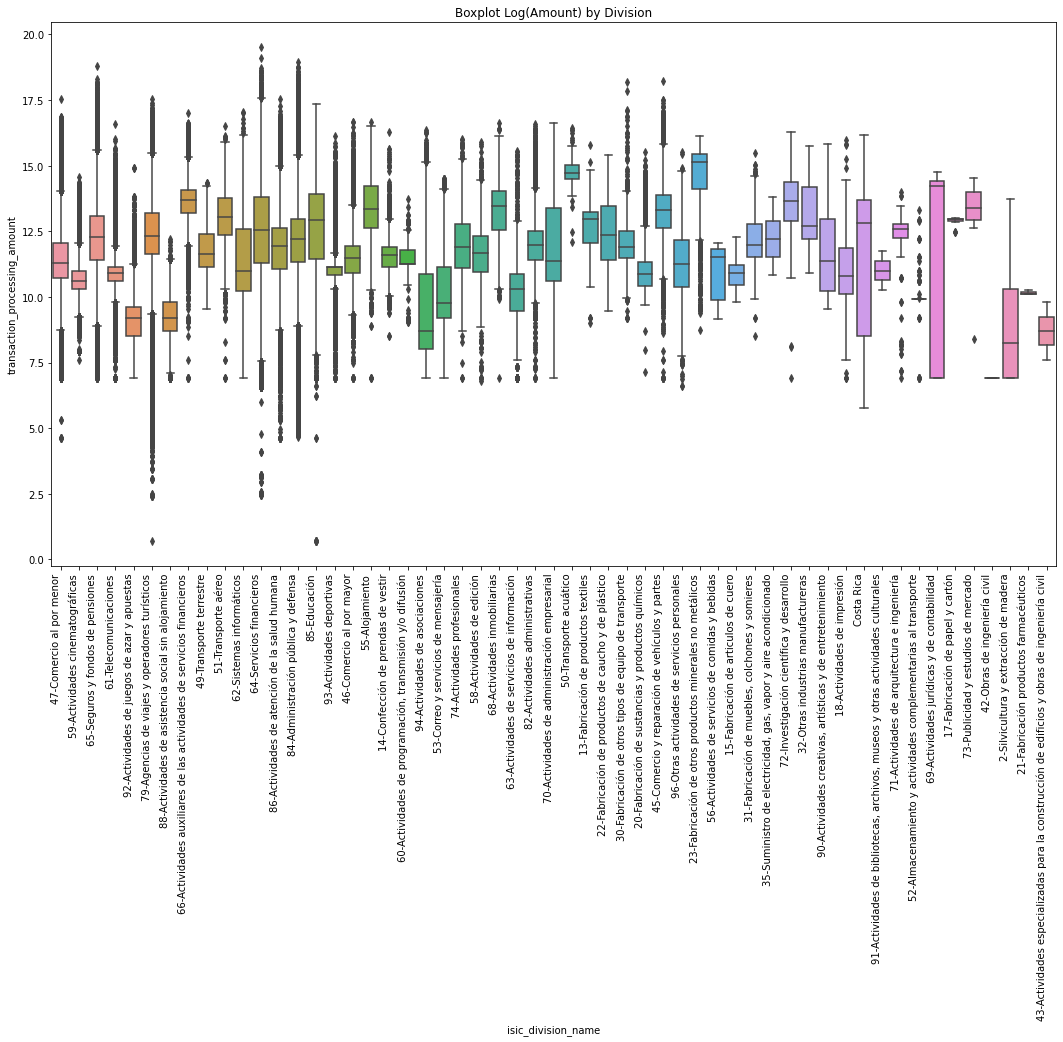

In [ ]:
plt.figure(figsize=(18,10))
fig=sns.boxplot(x="isic_division_name",y="transaction_processing_amount", data=bd_log)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Boxplot Log(Amount) by Division")

Text(0.5, 1.0, 'Boxplot Log(Amount) by Division')

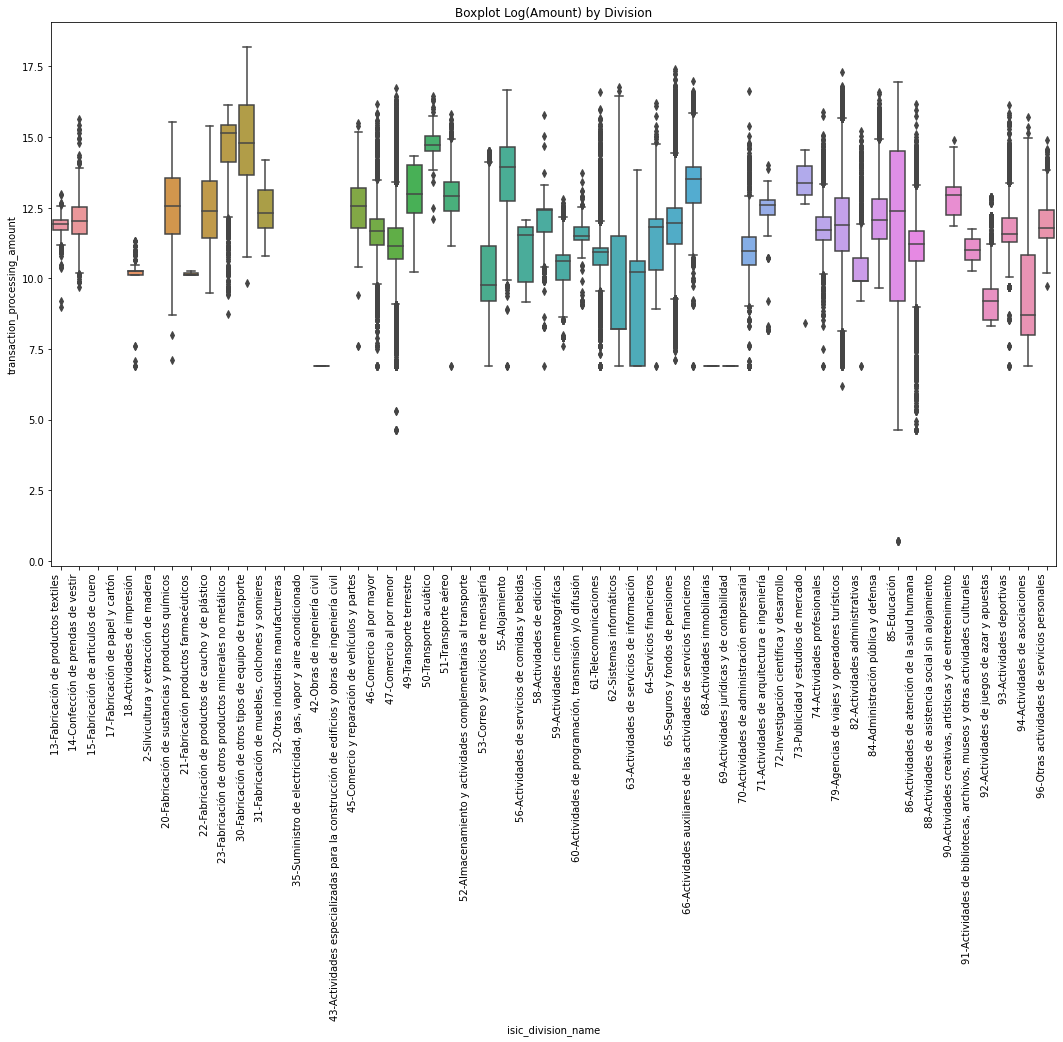

In [ ]:
#DONT RUN
# after filtering only e-commerce

plt.figure(figsize=(18,10))
fig=sns.boxplot(x="isic_division_name",y="transaction_processing_amount", data=bd_log)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Boxplot Log(Amount) by Division")

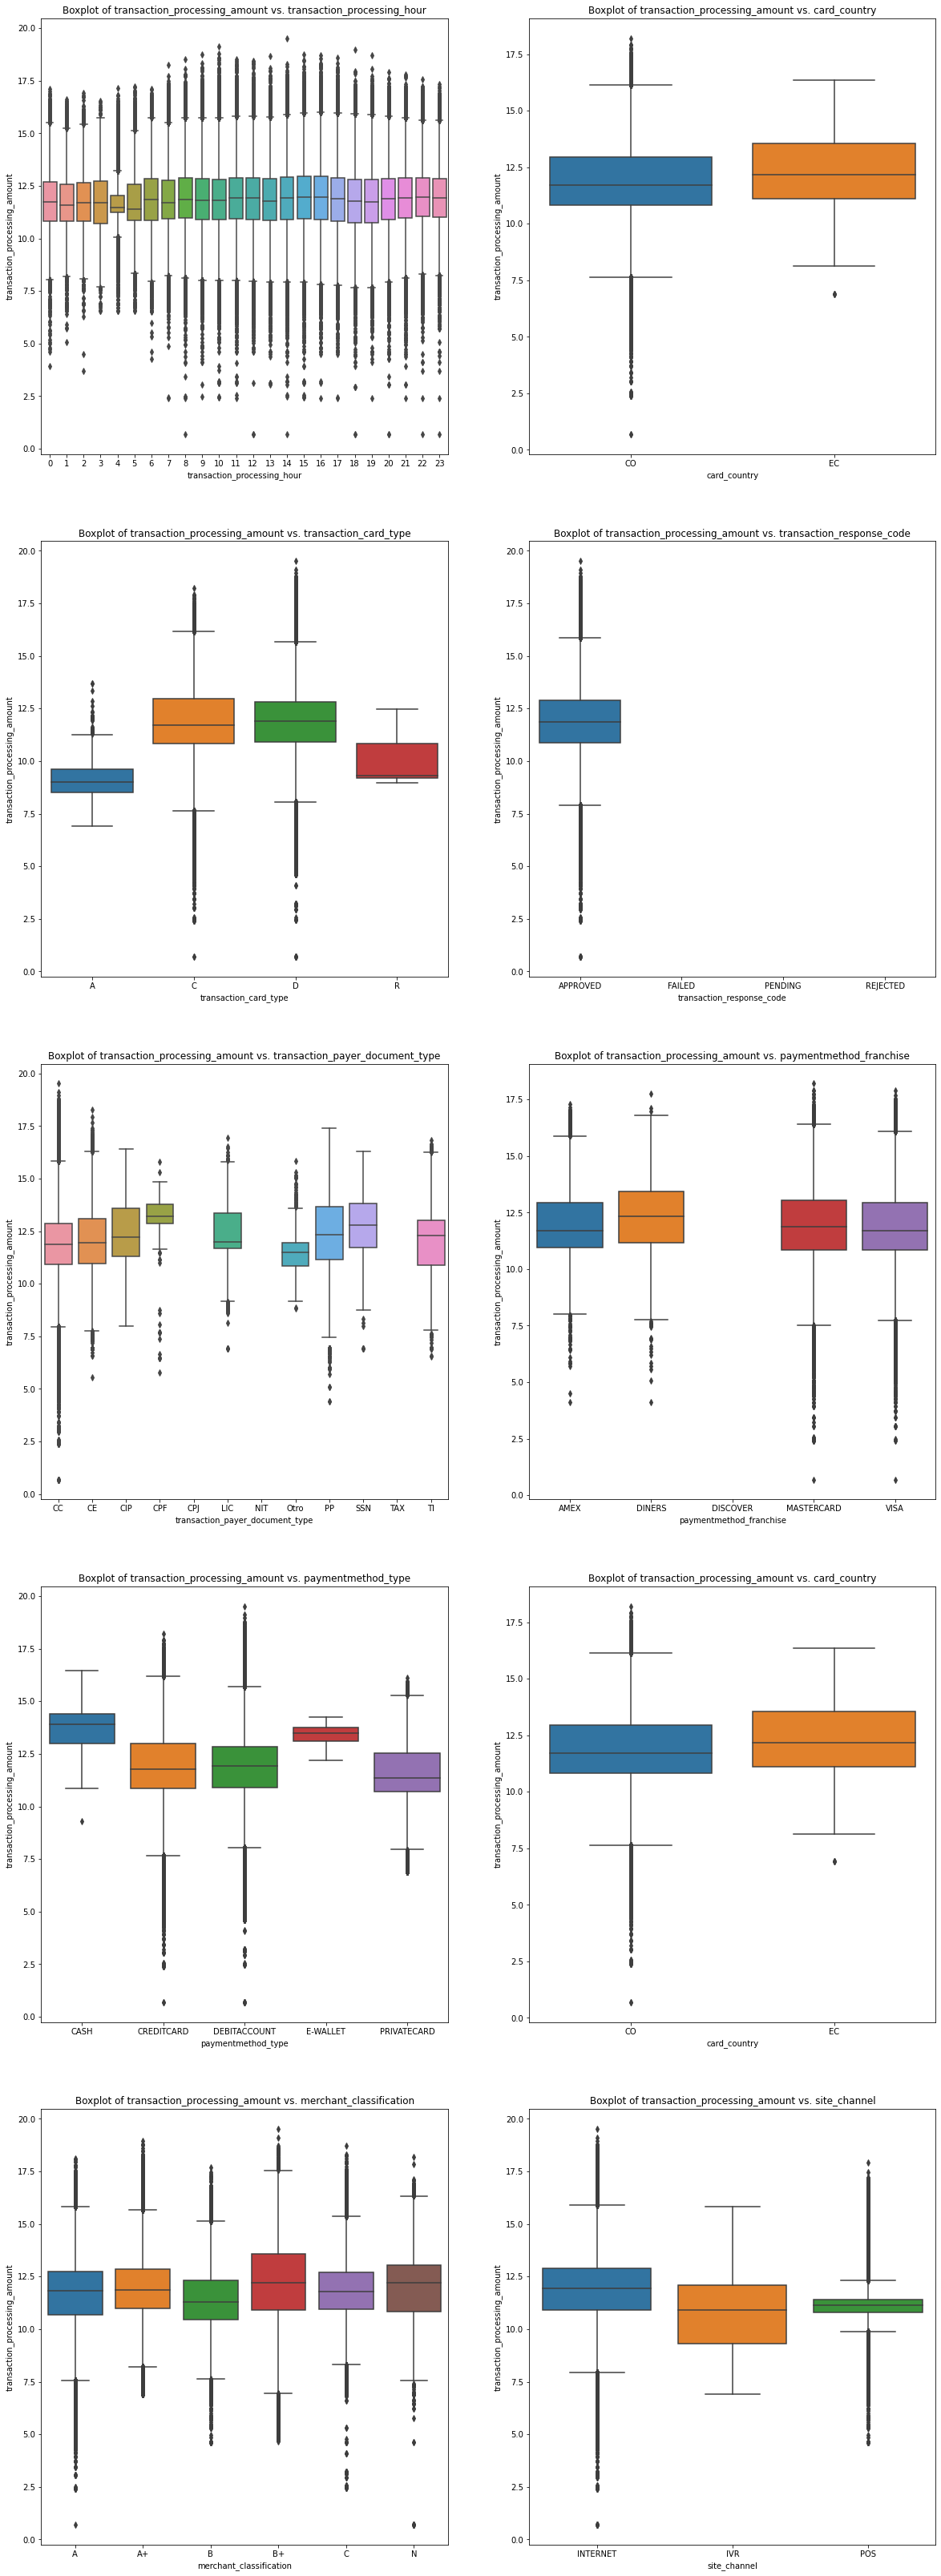

In [ ]:
# Boxplots
plt.figure(figsize=(20,70))
vars_to_plot = ['transaction_processing_hour','card_country','transaction_card_type', 'transaction_response_code', 
                'transaction_payer_document_type', 'paymentmethod_franchise',  'paymentmethod_type', 'card_country',
                'merchant_classification', 'site_channel']
for i, var in enumerate(vars_to_plot):
    plt.subplot(6,2,i+1)
    sns.boxplot(x = var, y='transaction_processing_amount', data = bd_log)
    title_string = "Boxplot of transaction_processing_amount vs. " + var
    plt.ylabel("transaction_processing_amount")
    #plt.xticks(rotation=90, horizontalalignment='right')
    #fig.set_xticklabels(fig.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.title(title_string)

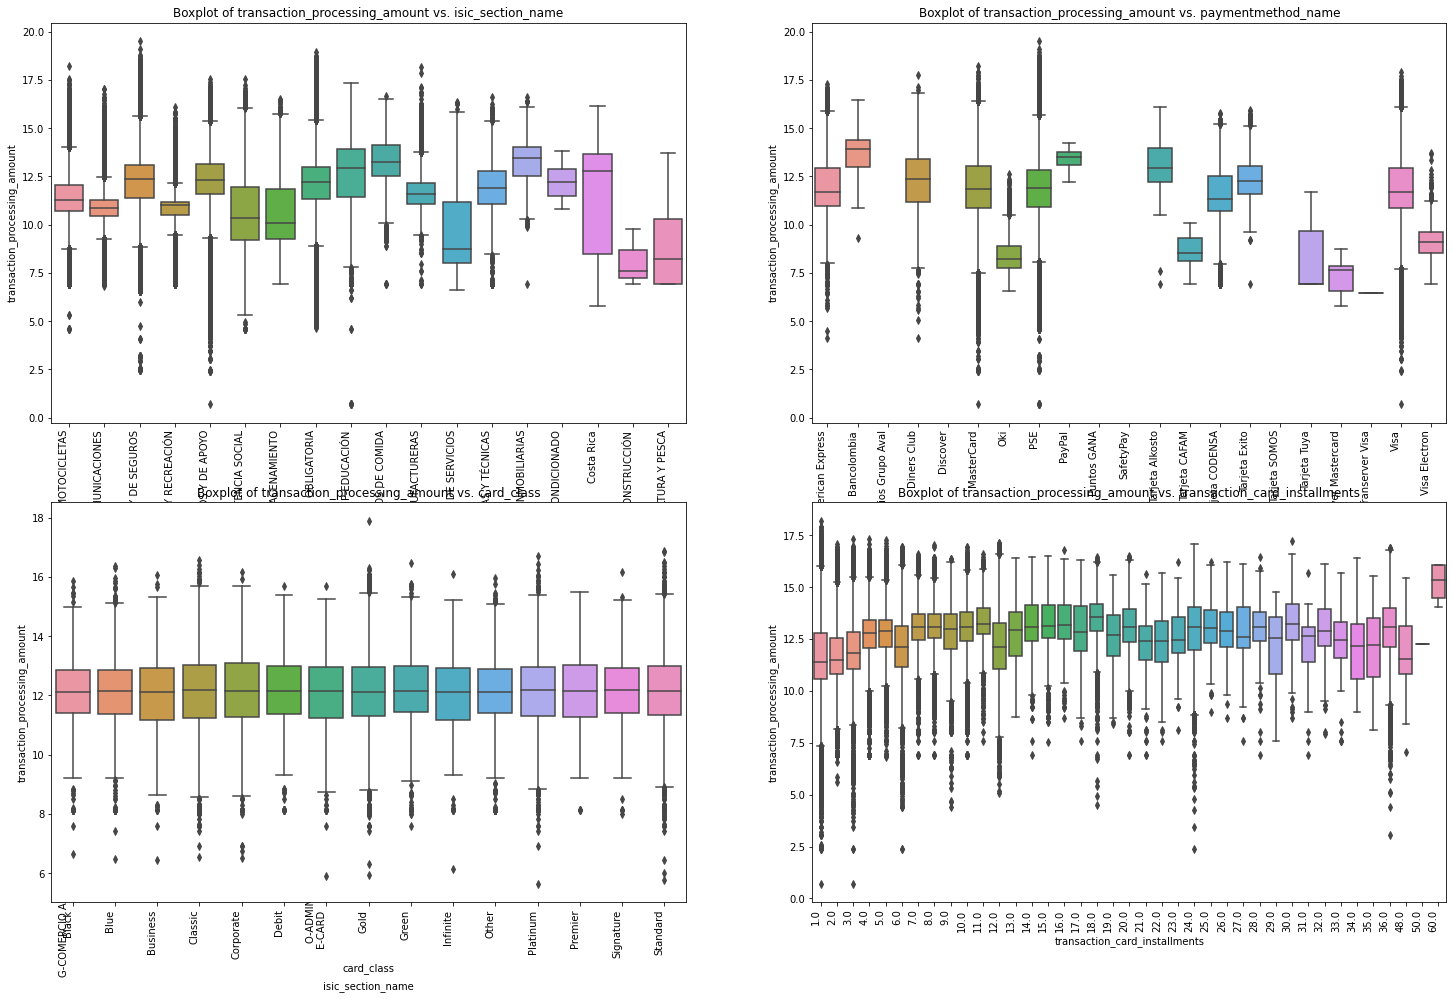

In [ ]:

plt.figure(figsize=(25,25))
vars_to_plot = ['isic_section_name', 'paymentmethod_name', 'card_class', 'transaction_card_installments']
for i, var in enumerate(vars_to_plot):
    plt.subplot(3,2,i+1)
    sns.boxplot(x = var, y='transaction_processing_amount', data = bd_log)
    title_string = "Boxplot of transaction_processing_amount vs. " + var
    plt.ylabel("transaction_processing_amount")
    plt.xticks(rotation=90, horizontalalignment='right')
    #fig.set_xticklabels(fig.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.title(title_string)

Text(0.5, 1.0, 'Boxplot of transaction_processing_amount vs. card_country')

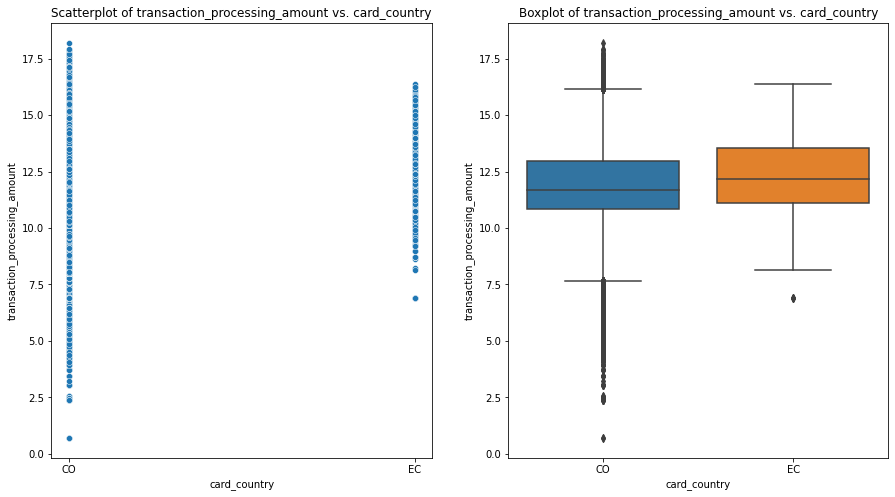

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.scatterplot(x='card_country',y = 'transaction_processing_amount', data = bd_log)
plt.ylabel("transaction_processing_amount")
plt.title("Scatterplot of transaction_processing_amount vs. card_country")
plt.subplot(122)
sns.boxplot(x='card_country',y= 'transaction_processing_amount', data = bd_log)
plt.ylabel("transaction_processing_amount")
plt.title("Boxplot of transaction_processing_amount vs. card_country")

### Frequency distributions of transaction_amount

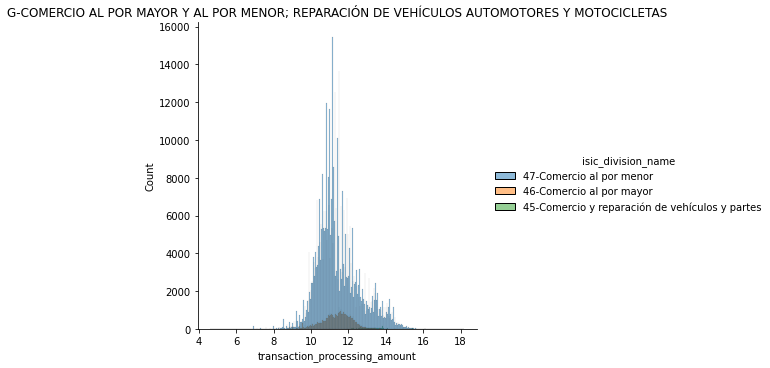

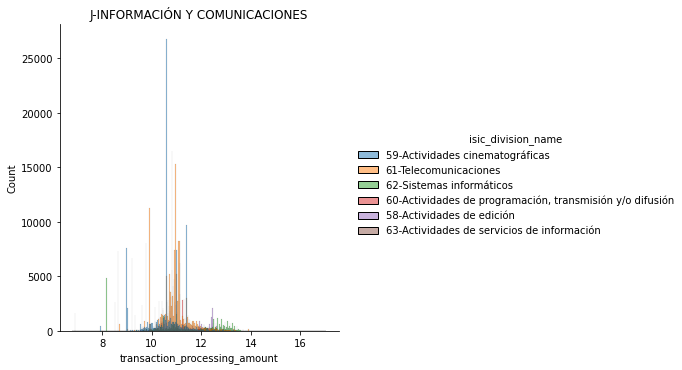

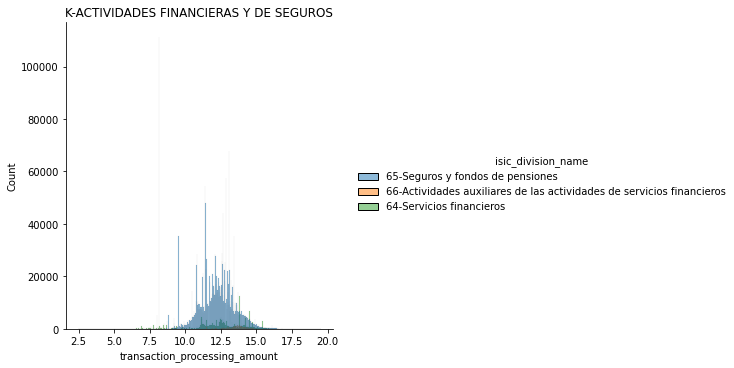

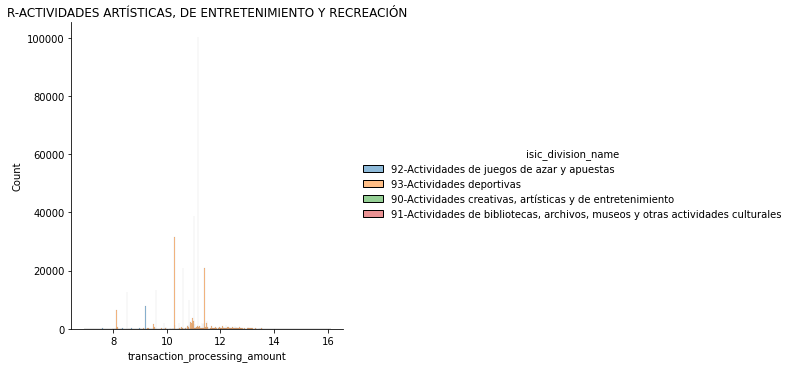

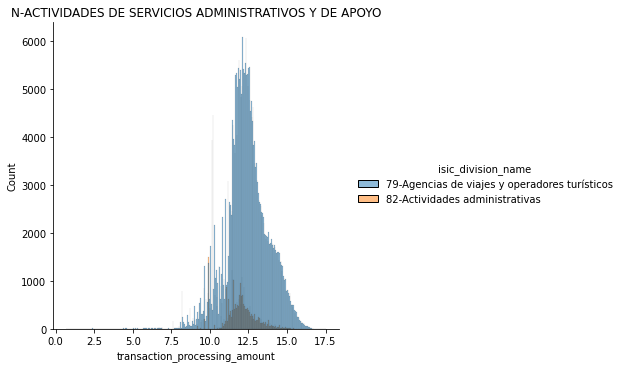

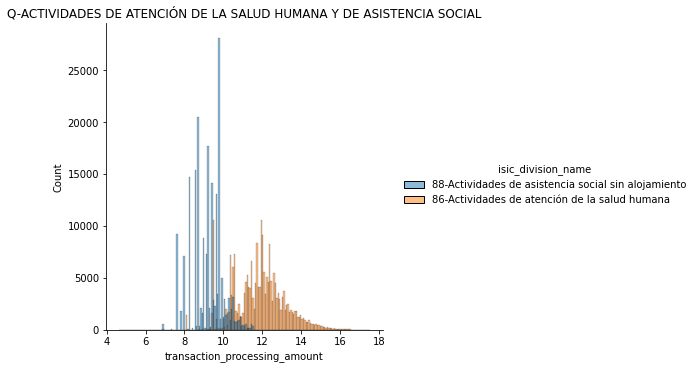

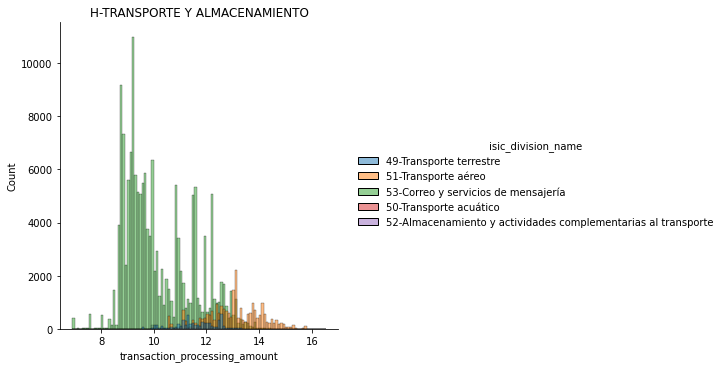

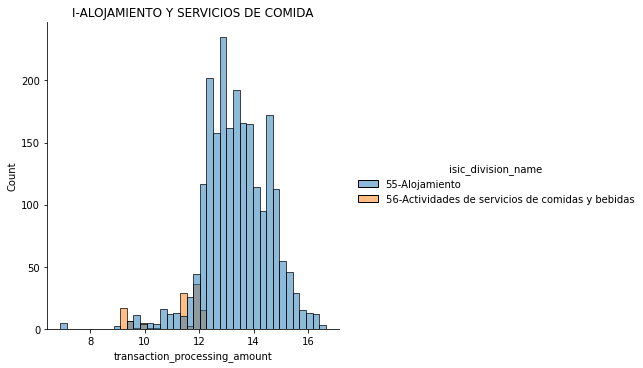

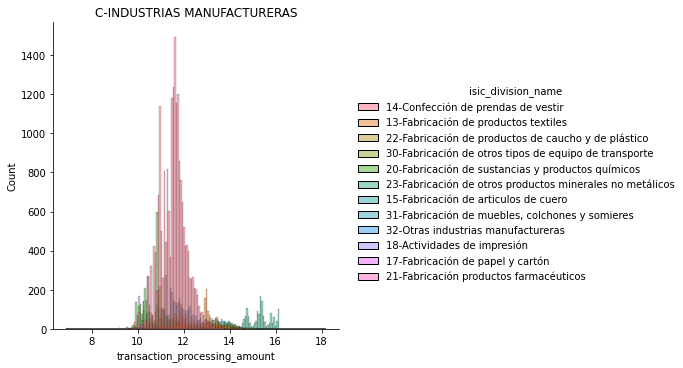

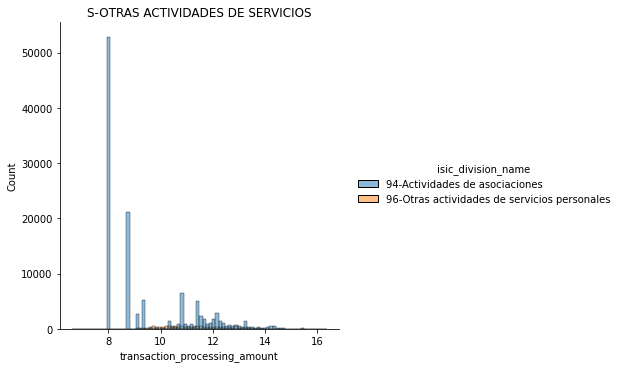

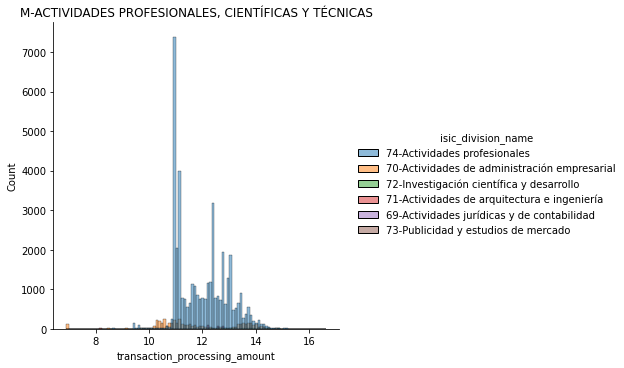

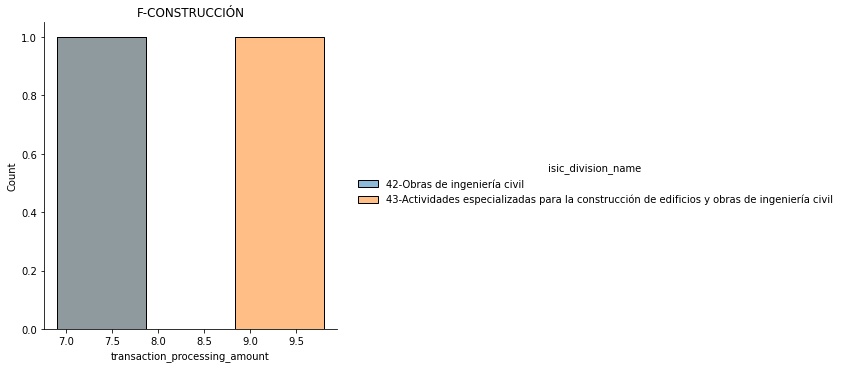

In [ ]:
#Frequency distributions of each merchant subcategory (division), grouped by merchant category (section)

for i in bd_log.isic_section_name.dropna().unique():
    bd_temp = bd_log[bd_log["isic_section_name"] == i]
    j = len(bd_temp["isic_division_name"].dropna().unique())
    
    if j > 1:
      g = sns.displot(bd_temp, x='transaction_processing_amount', hue='isic_division_name')
      #g.set_title(i)
      plt.title(i)

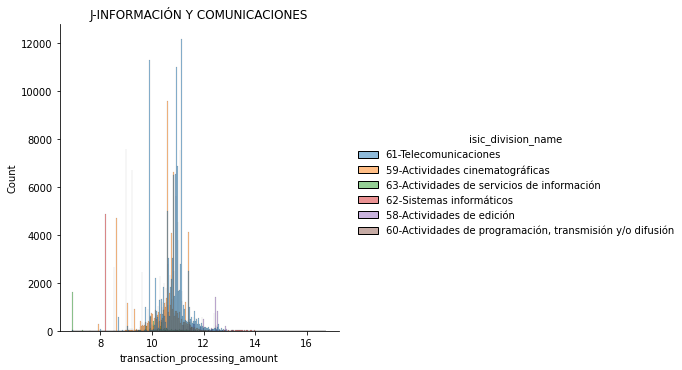

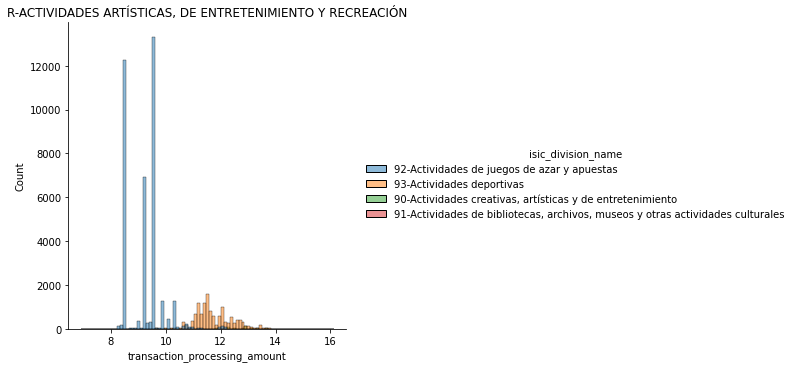

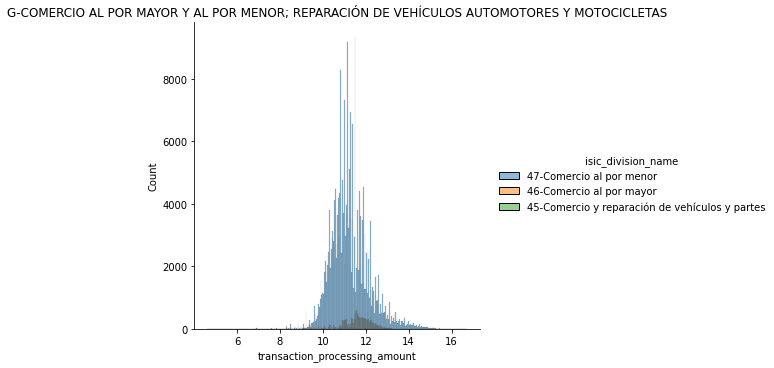

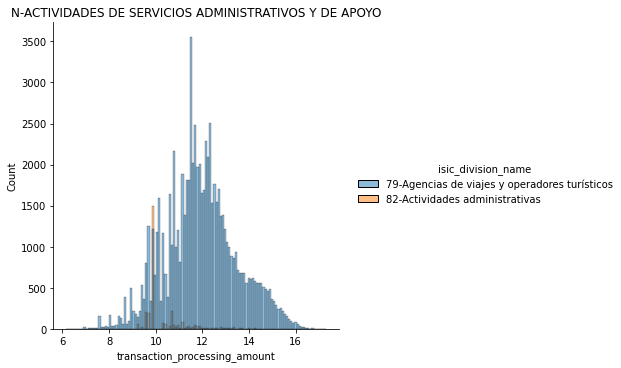

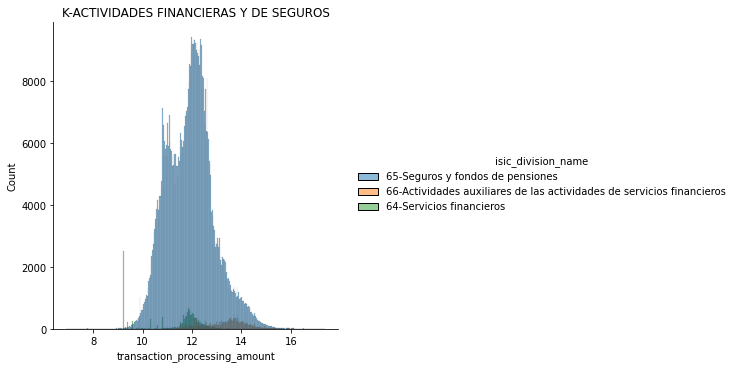

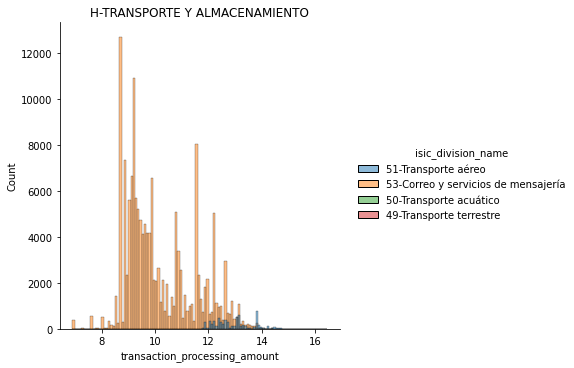

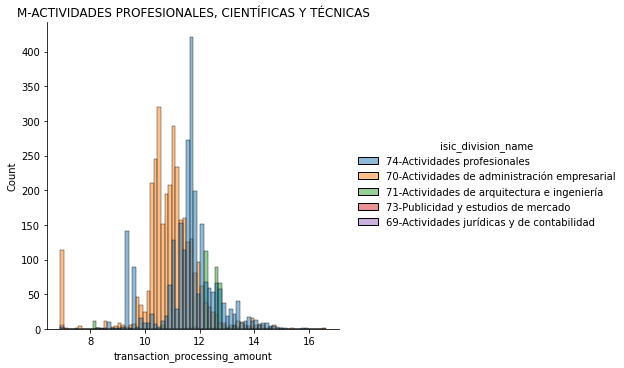

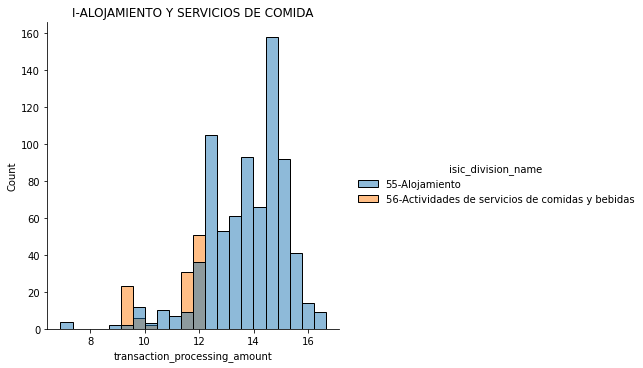

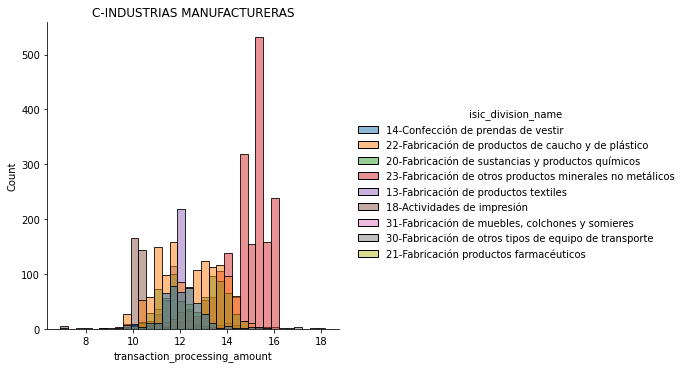

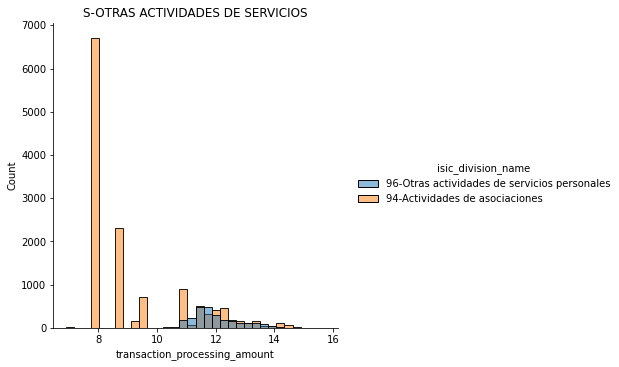

In [ ]:
# DONT RUN
# After filtering only e-commerce

#Frequency distributions of each merchant subcategory (division), grouped by merchant category (section)

for i in bd_log.isic_section_name.dropna().unique():
    bd_temp = bd_log[bd_log["isic_section_name"] == i]
    j = len(bd_temp["isic_division_name"].dropna().unique())
    
    if j > 1:
      g = sns.displot(bd_temp, x='transaction_processing_amount', hue='isic_division_name')
      #g.set_title(i)
      plt.title(i)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\USER\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


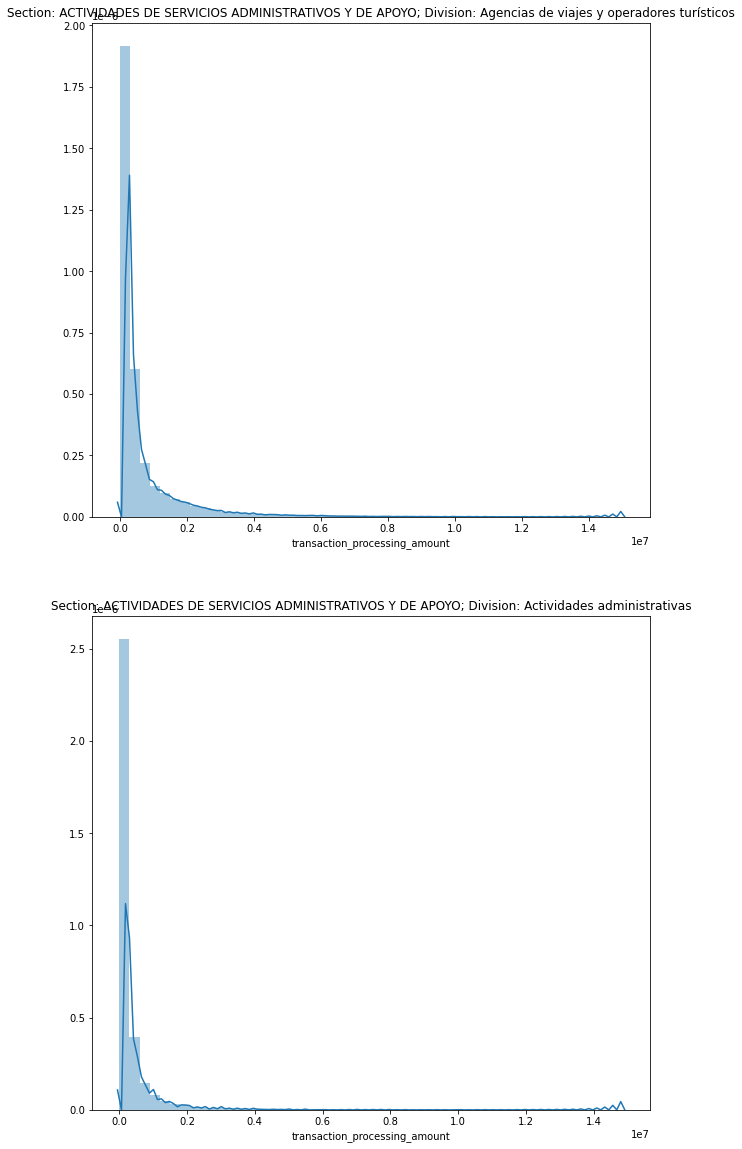

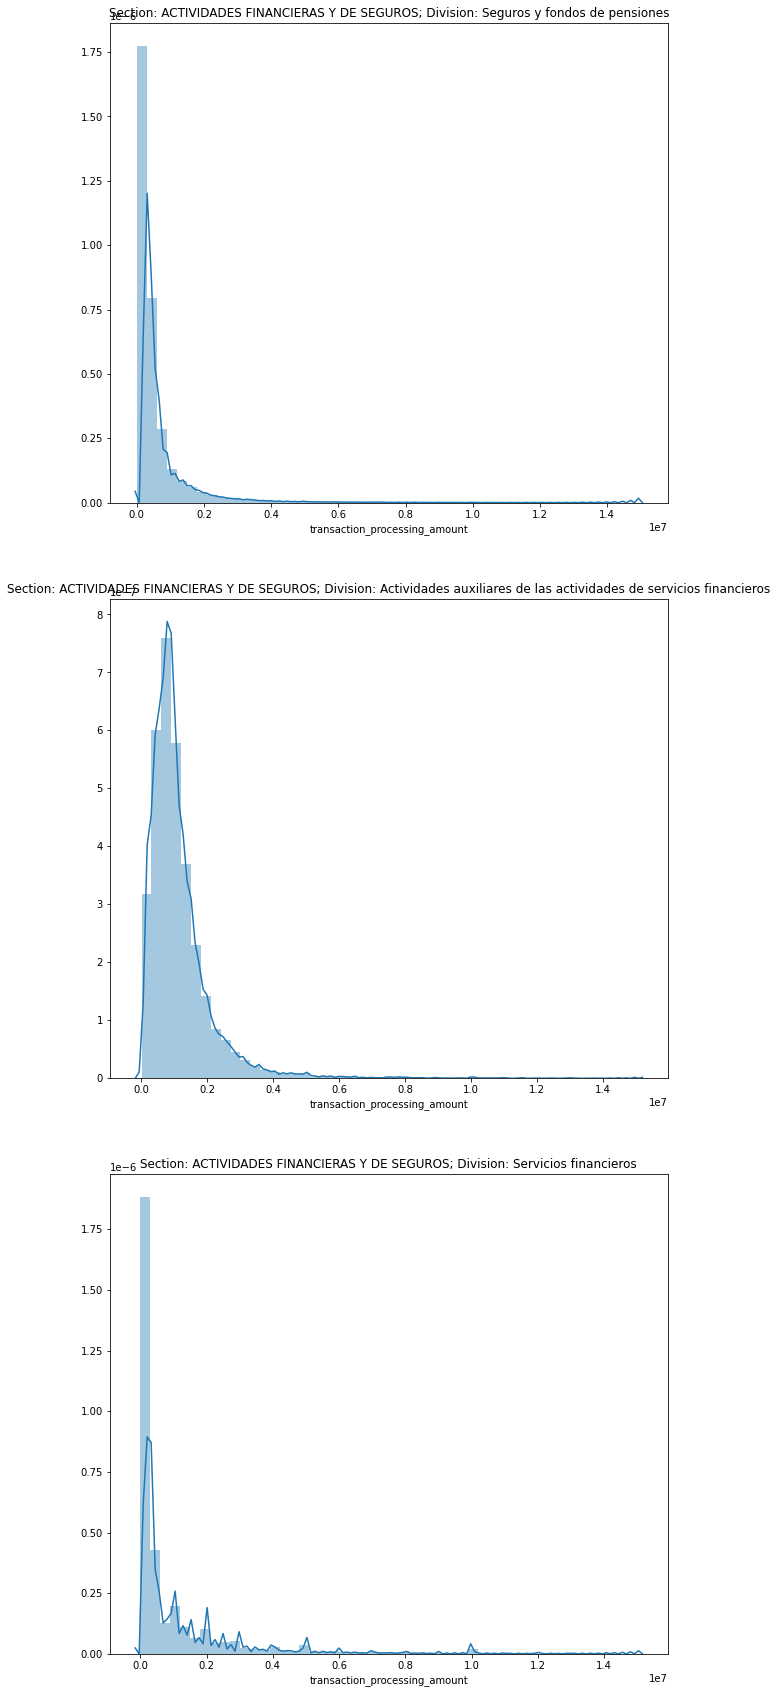

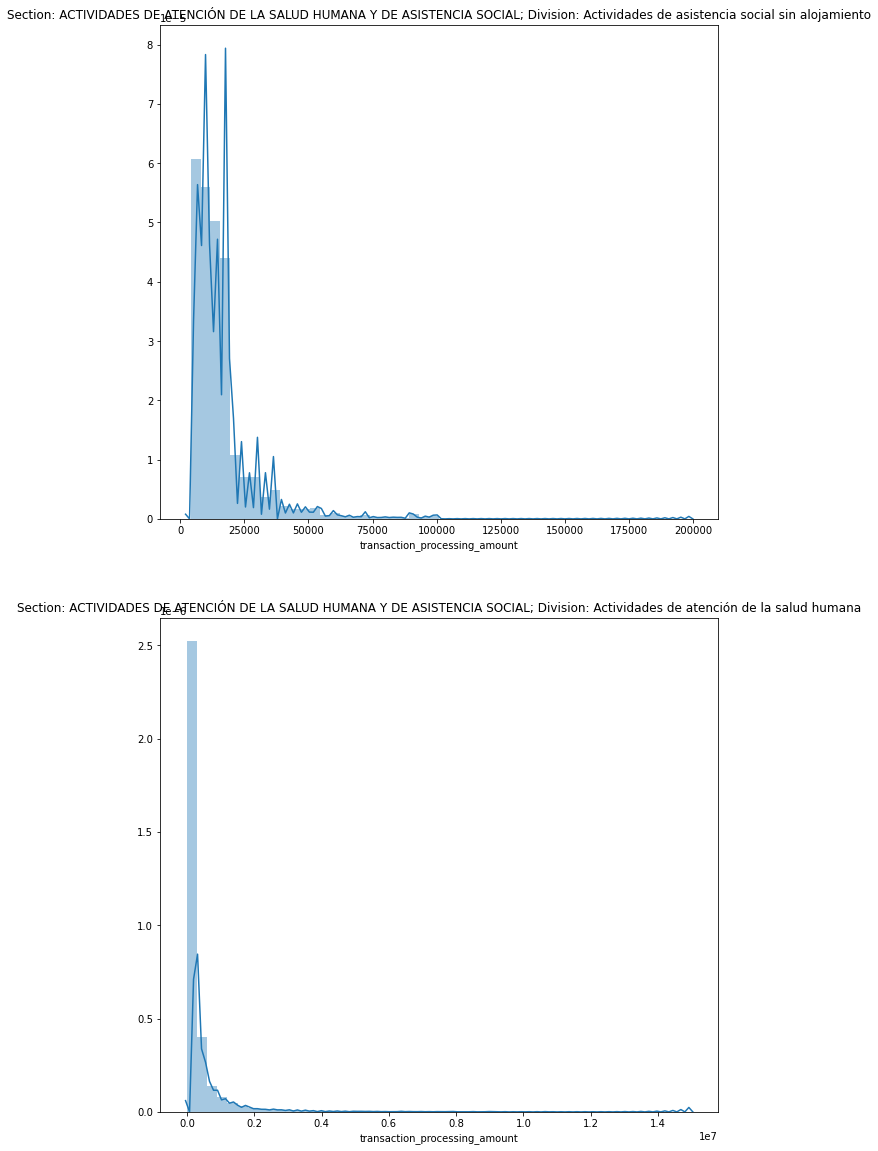

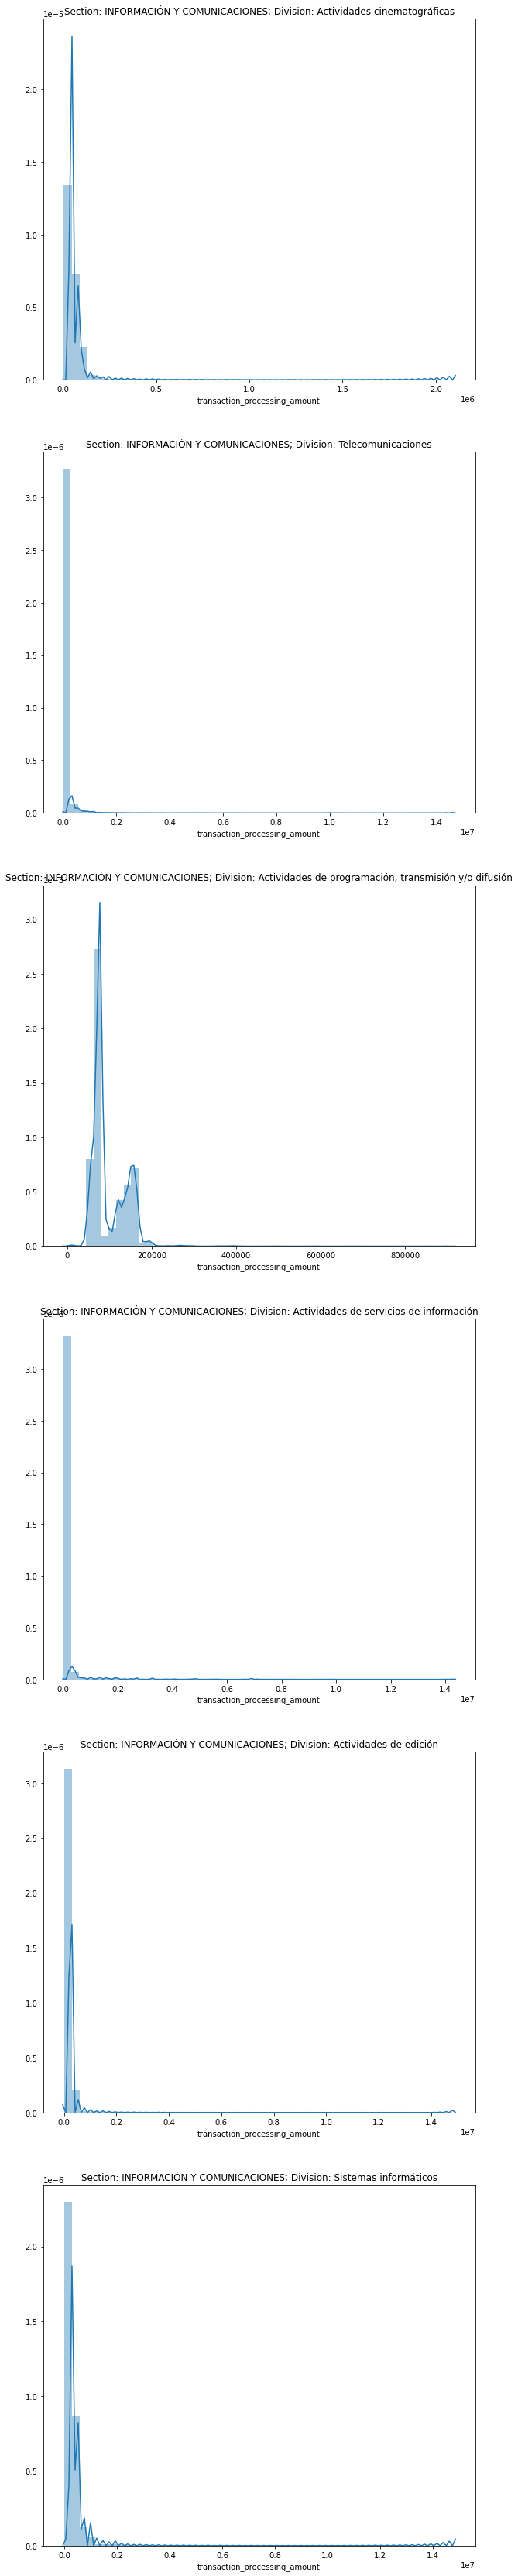

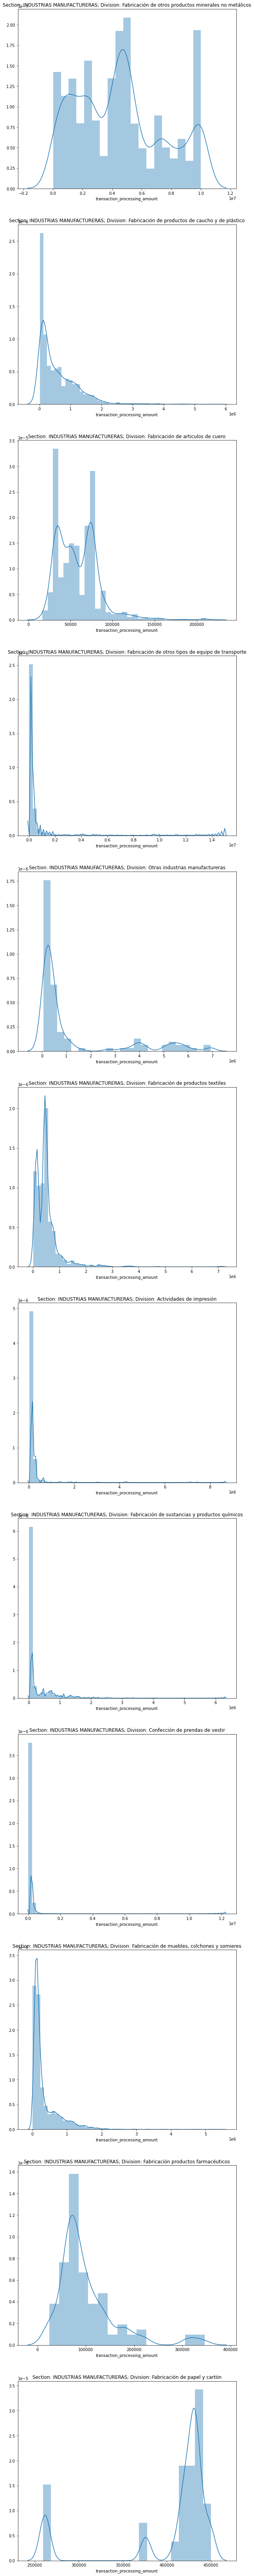

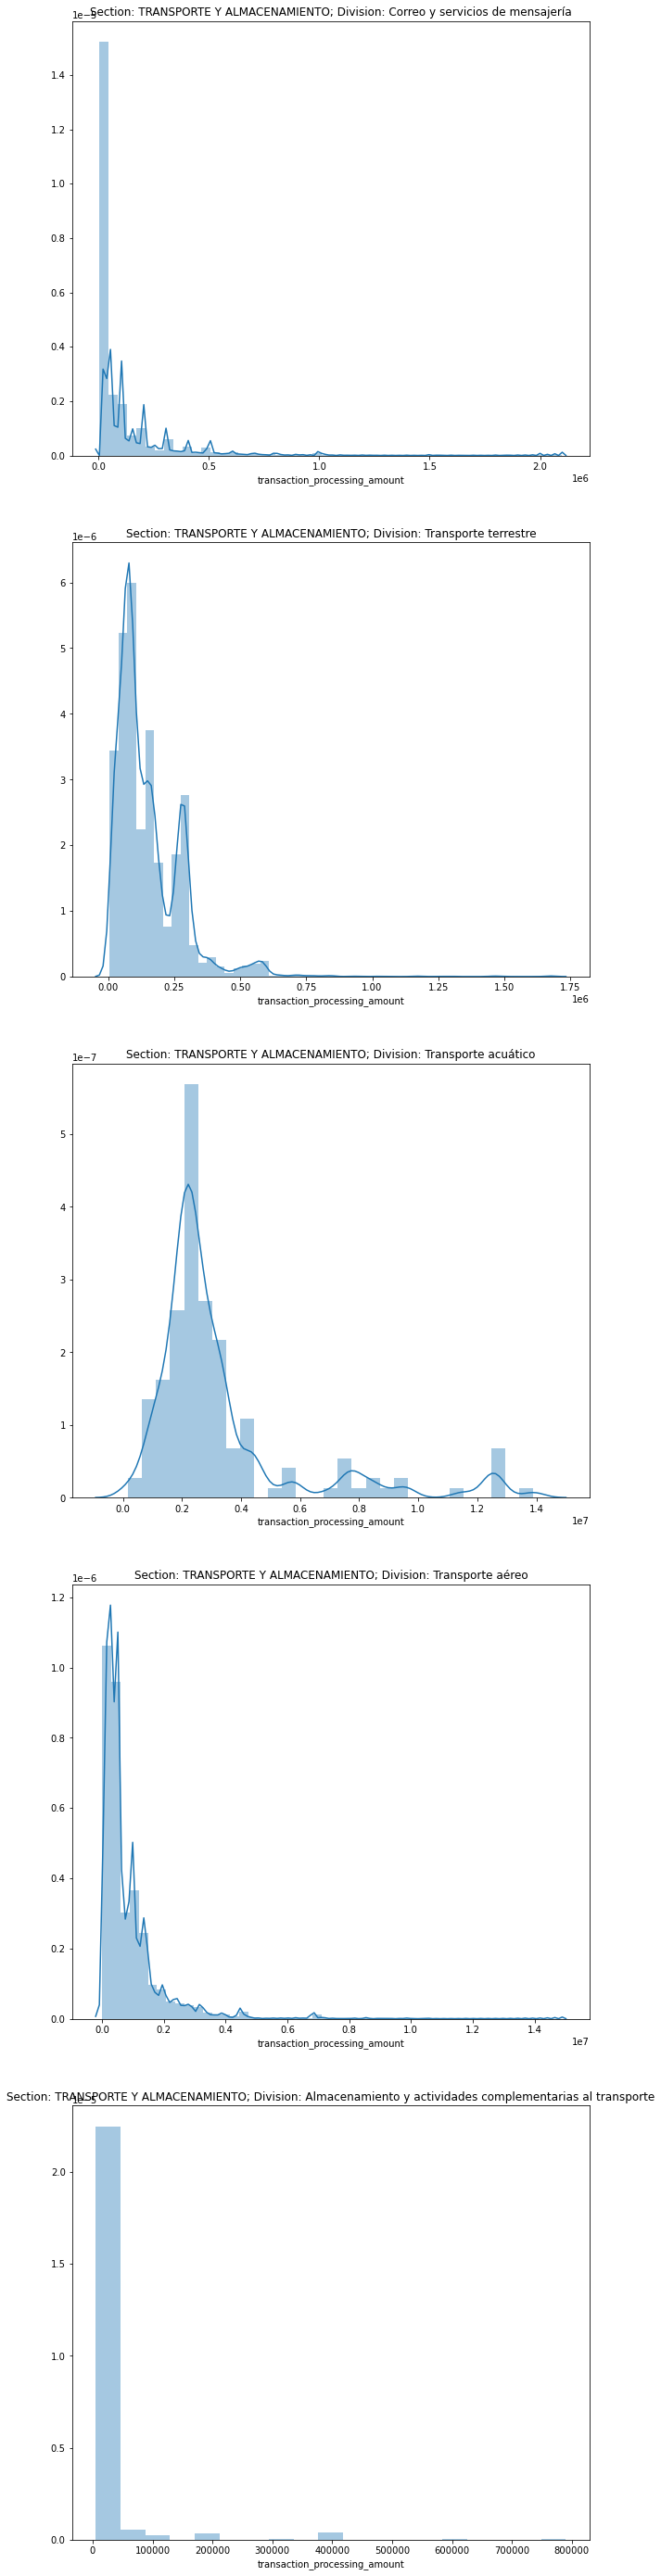

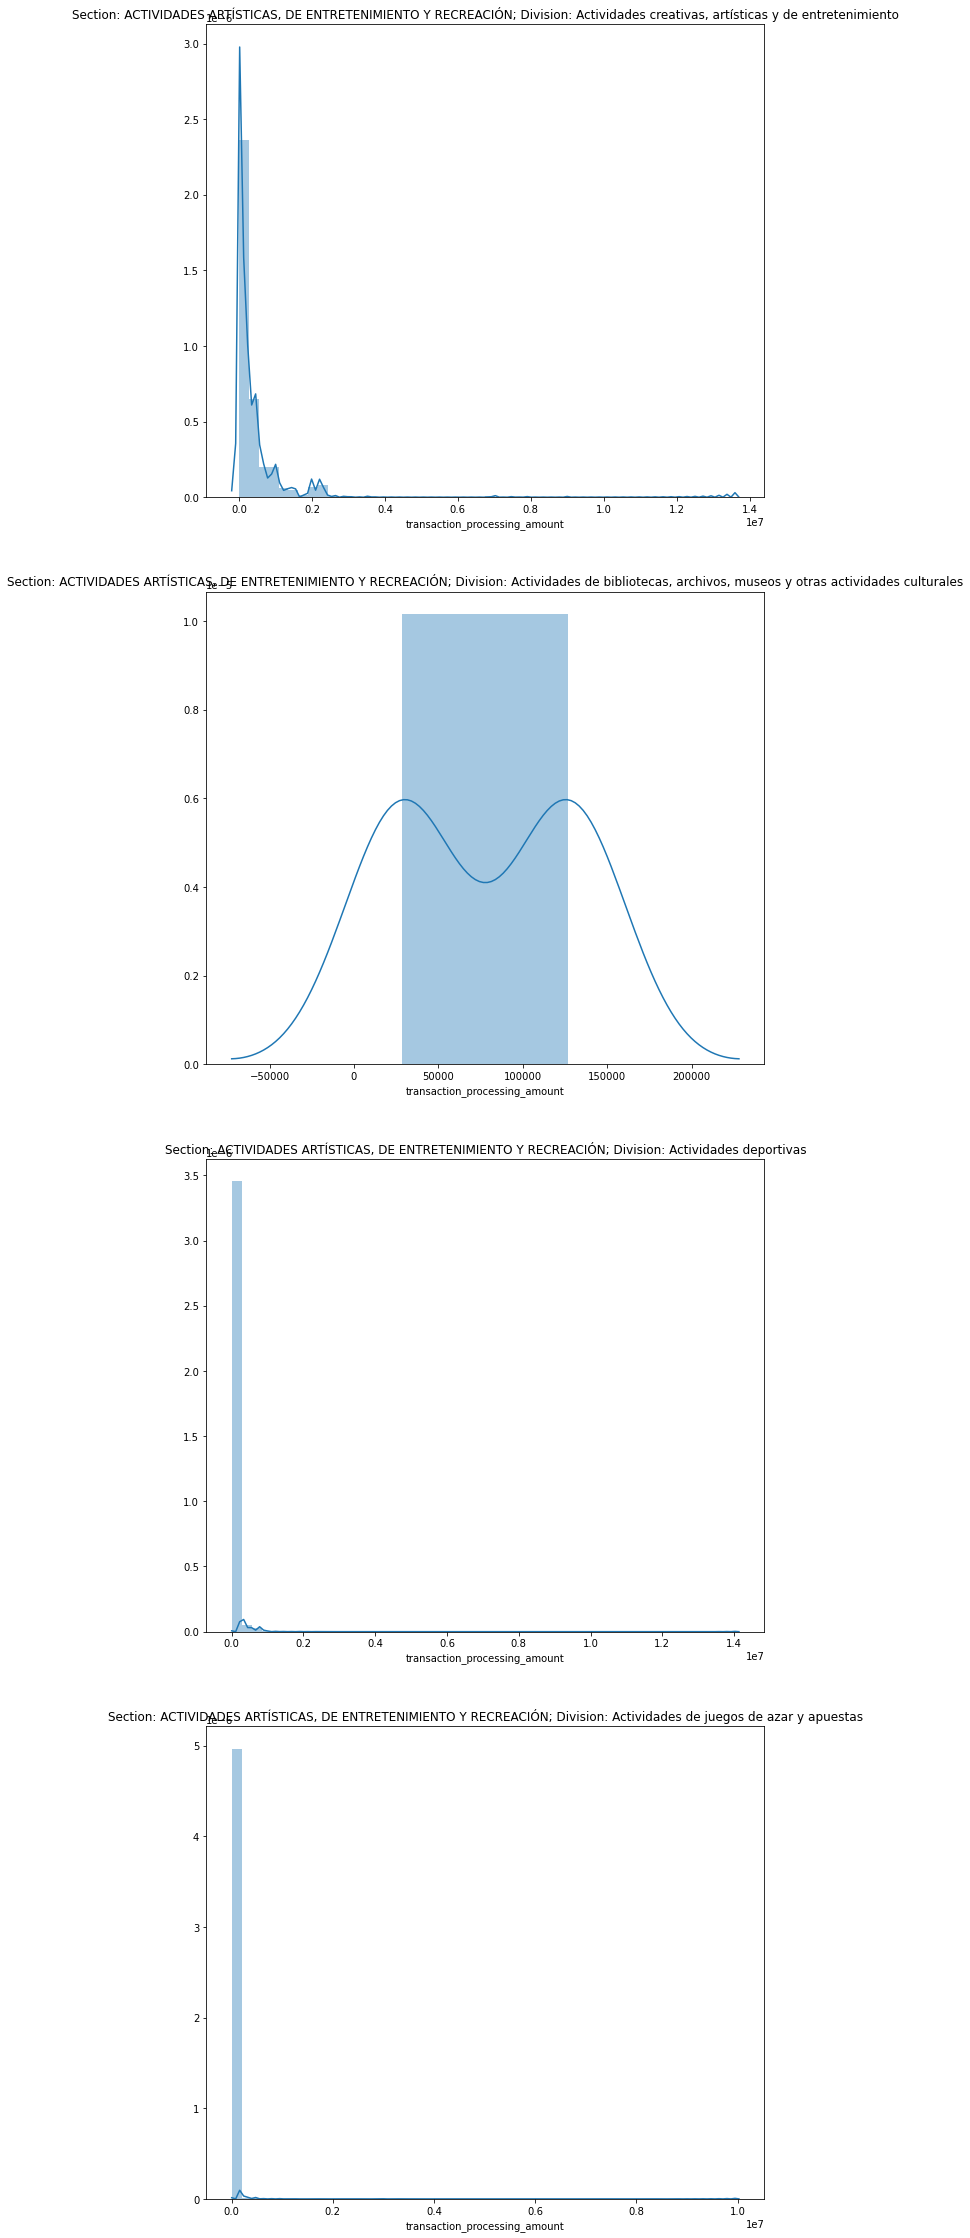

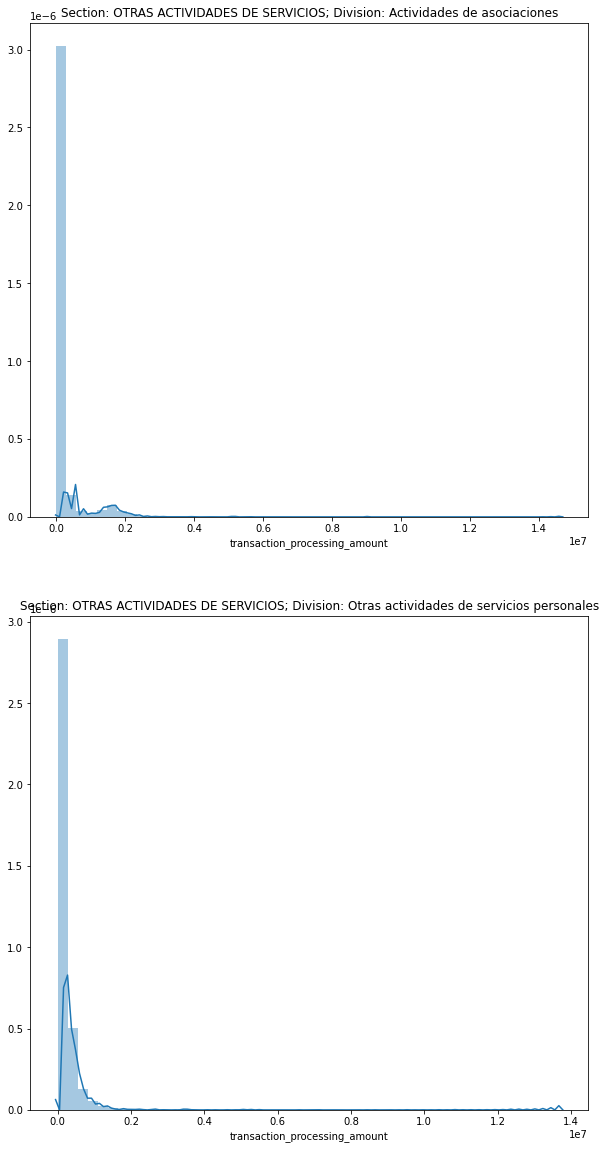

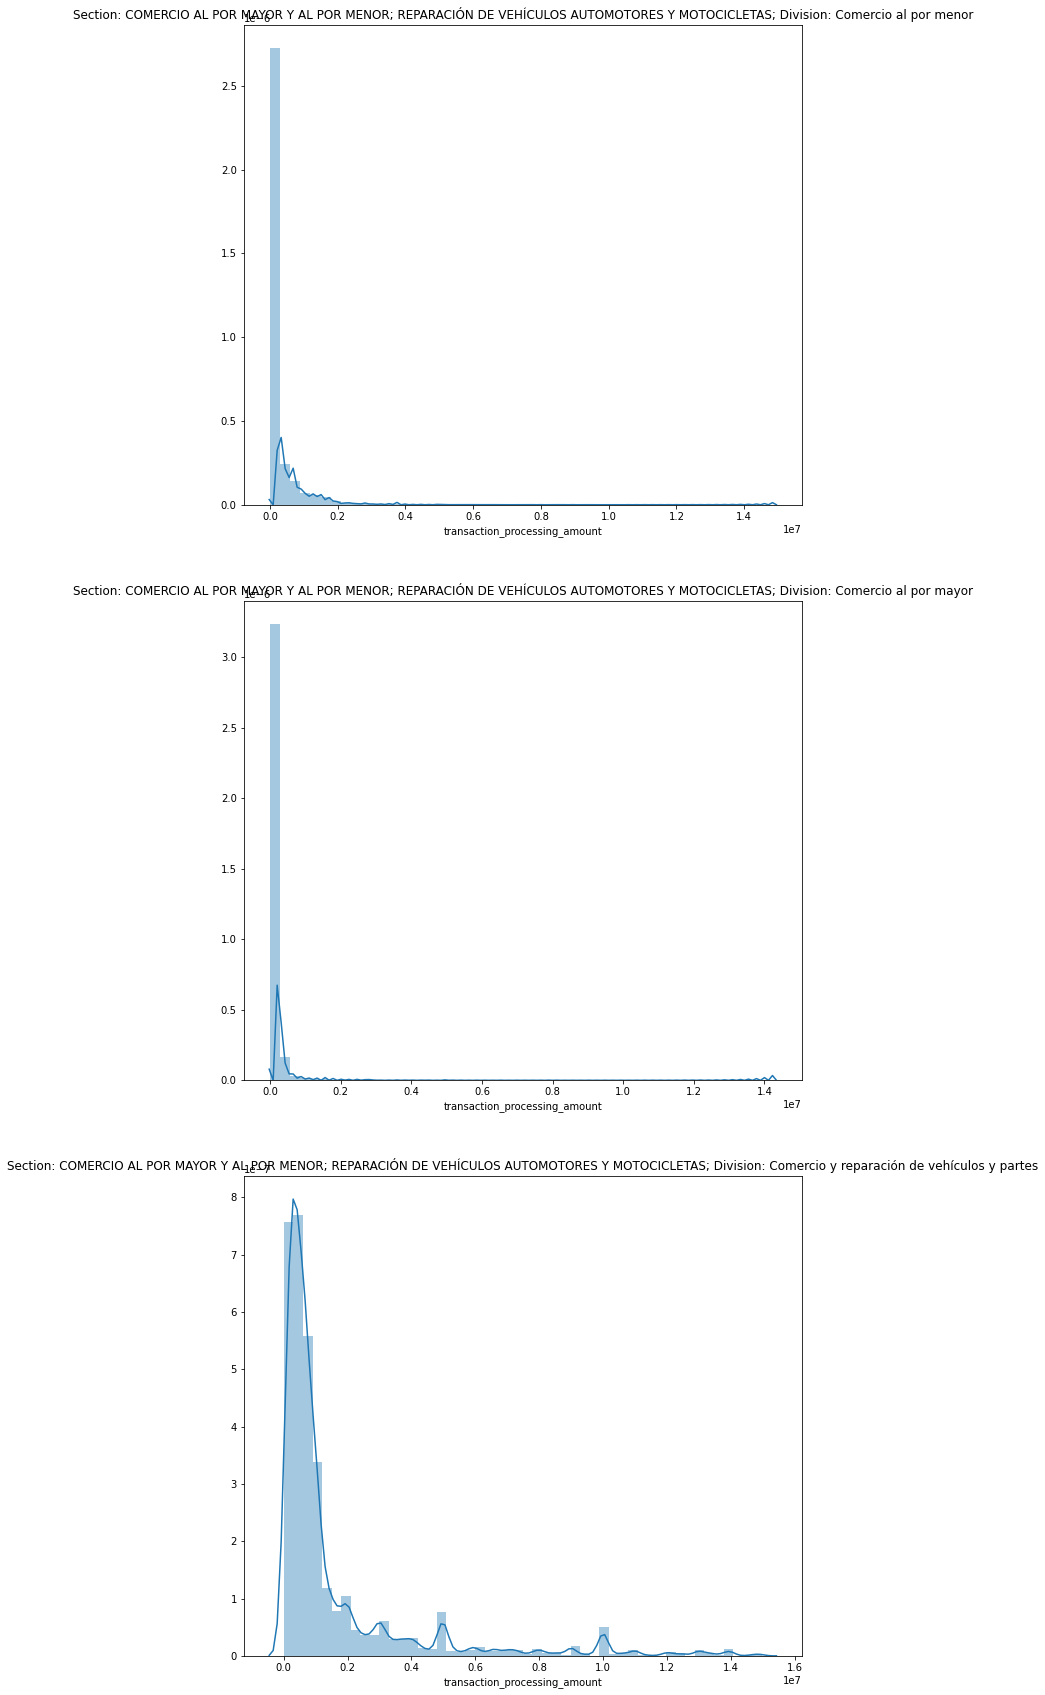

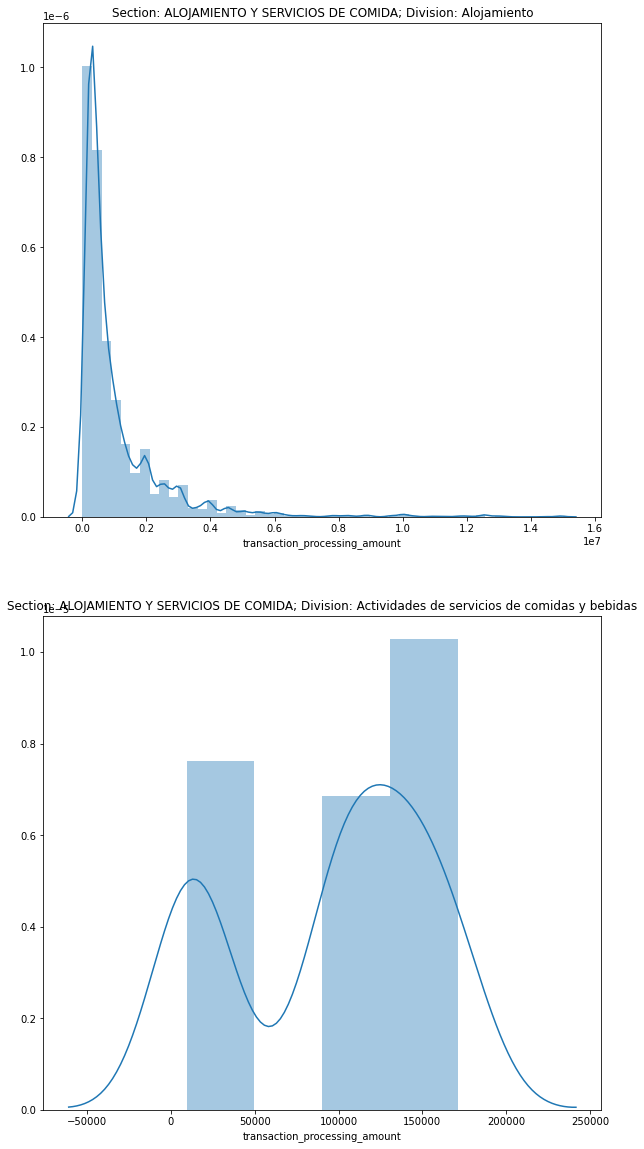

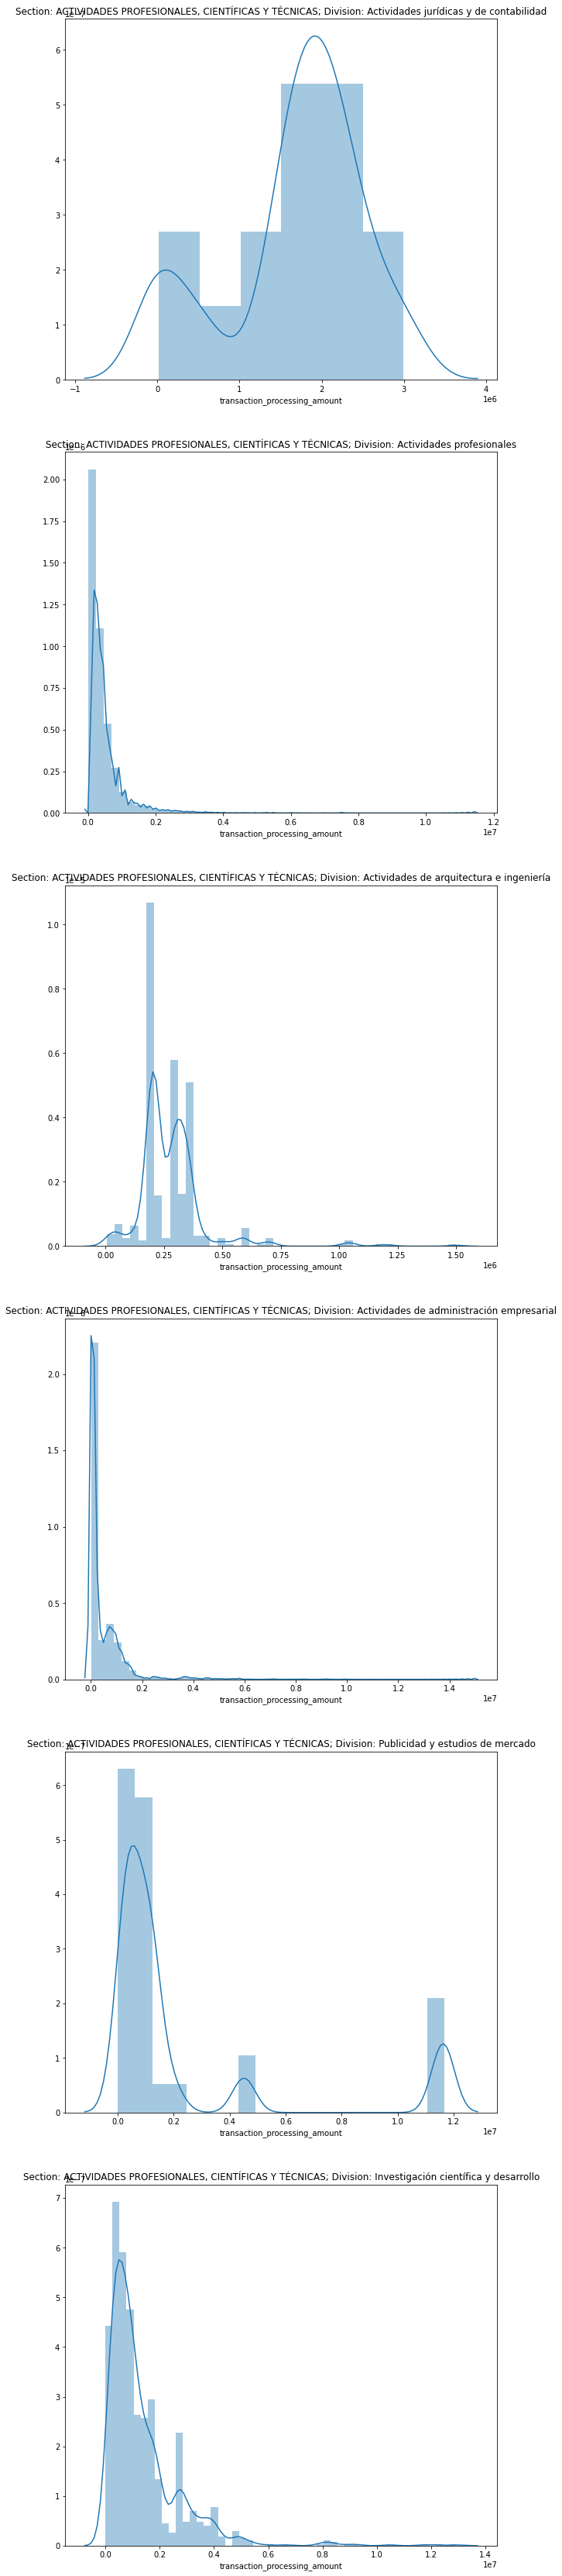

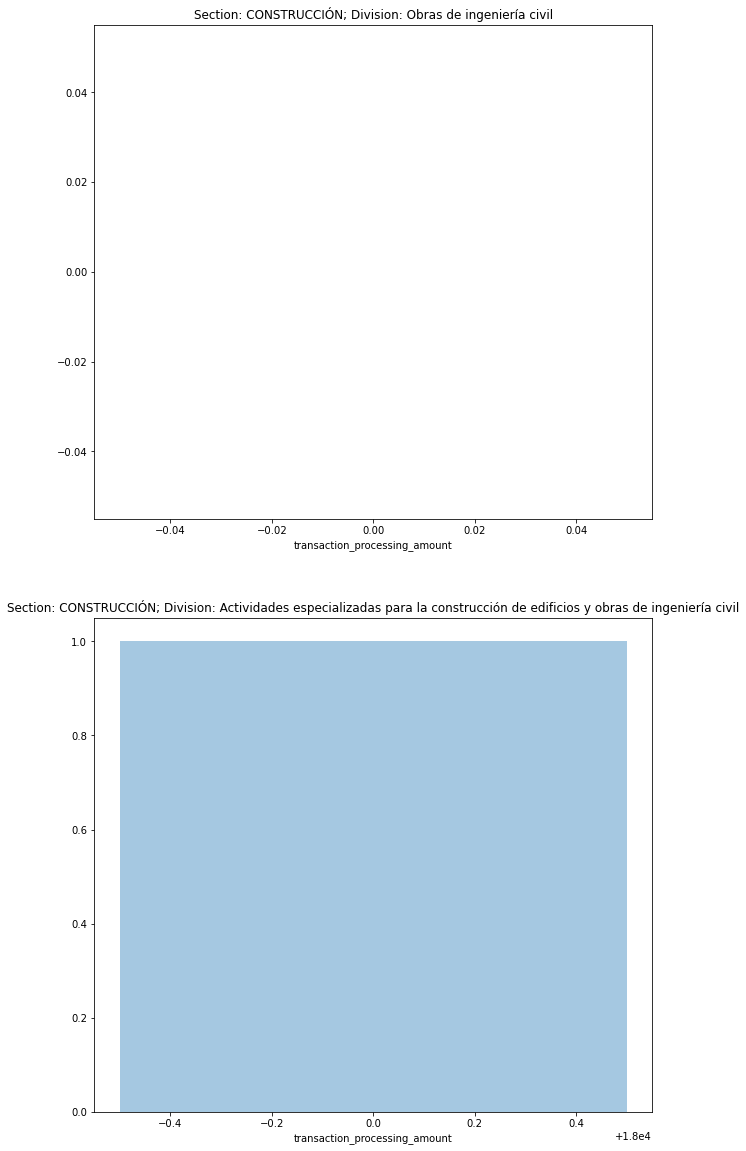

In [ ]:
for i in bd.isic_section_name.dropna().unique():
    j=0
    if bd[bd["isic_section_name"] == i]["isic_division_name"].dropna().unique().shape[0] > 1:
        figure, axes = plt.subplots(nrows=bd[bd["isic_section_name"] == i]["isic_division_name"].dropna().unique().shape[0], figsize=(10,10*bd[bd["isic_section_name"] == i]["isic_division_name"].dropna().unique().shape[0]))
        for k in bd[bd["isic_section_name"] == i]["isic_division_name"].dropna().unique():
            t_amount = bd[(bd["isic_division_name"] == k) & (bd["transaction_processing_amount"]<15000000) & (bd["transaction_processing_amount"]>4000)]["transaction_processing_amount"]
            sns.distplot(t_amount, ax=axes[j])
            axes[j].set_title("Section: " + str(i) + "; Division: " + str(k))
            j=j+1

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


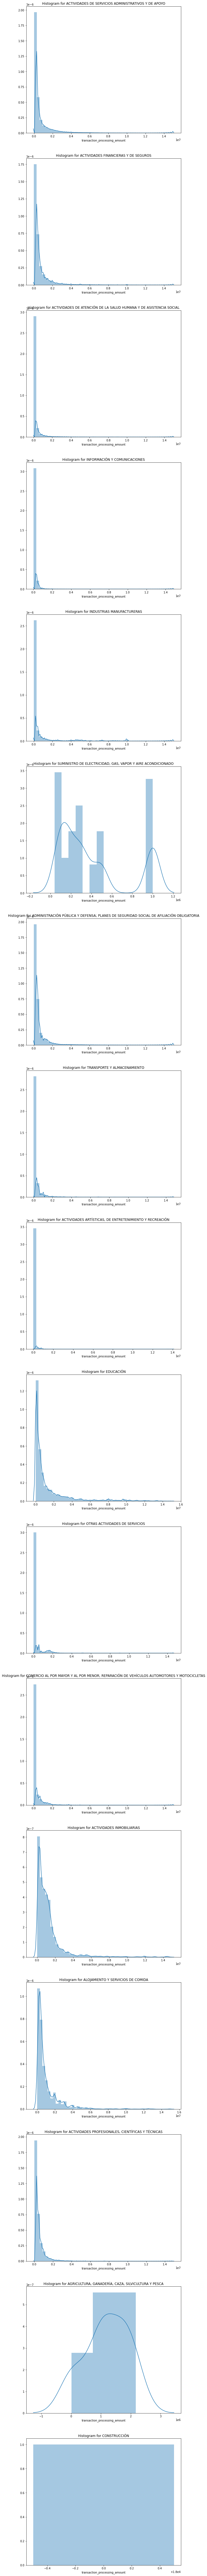

In [ ]:
figure, axes = plt.subplots(nrows=bd.isic_section_name.dropna().unique().shape[0], figsize=(10,10*bd.isic_section_name.dropna().unique().shape[0]))
j=0
for i in bd.isic_section_name.dropna().unique():
    t_amount = bd[(bd["isic_section_name"] == i) & (bd["transaction_processing_amount"]<15000000) & (bd["transaction_processing_amount"]>4000)]["transaction_processing_amount"]
    sns.distplot(t_amount, ax=axes[j])
    axes[j].set_title("Histogram for " + str(i))
    j=j+1

# 2- Exploring trends

## Temporal trends

We could use a line plot that shows purchases by day. using multiple lines, one for each user, with the hope of detecting visible trends and possible clusters of users with similar behavior. Such plots are one example of parallel coordinates plots.

In [ ]:
bd['weekday'] = pd.to_datetime(bd['transaction_processing_date_']).dt.day_name()
bd['week'] = pd.DatetimeIndex(bd['transaction_processing_date_']).week # DatetimeIndex.isocalendar().week   or  pd.Int64Index(idx.isocalendar().week)
bd['month'] = pd.DatetimeIndex(bd['transaction_processing_date_']).month
bd['year'] = pd.DatetimeIndex(bd['transaction_processing_date_']).year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



#### No. of transaction by hour

In [ ]:
# What time of the day people buy?
display(bd.groupby(bd.transaction_processing_hour)['transaction_id'].count().sort_values(ascending=False).head(10))
fig = go.Figure([go.Bar(x = bd['transaction_processing_hour'].value_counts().index,
                        y = bd['transaction_processing_hour'].value_counts().values)])
fig.show()

transaction_processing_hour
10    1005551
11     813871
9      725455
12     706924
15     699488
14     683221
16     673388
17     642377
13     625308
18     556633
Name: transaction_id, dtype: int64

Is this trend the same compared over different variables?

In [ ]:
# hour of processing of transactions made to a merchant that is not active
bd.merchant_enabled.value_counts()
bd[bd['merchant_enabled']=='Inactivo']['transaction_processing_hour'].value_counts()

16    291
15    267
17    244
14    227
12    221
11    214
10    188
9     176
18    164
13    163
20    163
19    139
21    125
22    100
8      89
23     77
7      39
0      35
6      19
1      13
2      11
3       8
4       4
5       2
Name: transaction_processing_hour, dtype: int64

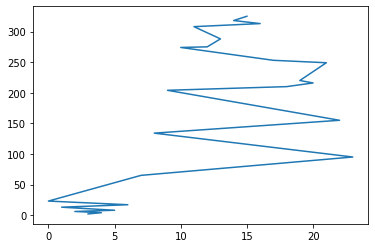

In [ ]:
# hour of processing of transactions made to a merchant that is not active
bd[bd['merchant_enabled']=='Inactivo']['transaction_processing_hour'].value_counts().plot()


We can see from this plots that sometimes there is not a linear proportion between Number of transactions and aggregated amount of money in those transactions. In particular in the case of the Entertainment section and Education sector.

## Geographical Trends

In [ ]:
bd.shape

(7028504, 32)

In [ ]:
len(bd.ip_location_region_name.value_counts())

1266

In [ ]:
bd.merchant_address_city.value_counts()

Medellin               3325665
Bogota                 2844992
Cali                    413788
Barranquilla            131923
Sabaneta                 53677
Bucaramanga              35165
Armenia                  33663
Itagui                   29583
Villavicencio            28424
Pereira                  24500
Manizales                14446
Facatativa               11840
Chia                     11580
Monteria                  7900
Santa Marta               7417
Sincelejo                 7002
Yopal                     5112
Yumbo                     4682
Neiva                     4613
Cartagena                 4262
Rionegro                  3453
Montenegro                3366
Envigado                  3052
Ibague                    2408
La Estrella               2380
Cucuta                    1797
La Calera                 1571
Soledad                   1504
San Andres Islas          1319
Guarne                    1179
Pasto                      795
Barrancabermeja            739
Caldas  

In [ ]:
citylist = bd.merchant_address_city.value_counts().head(20).index.tolist()

In [ ]:
bd.loc[bd[bd['ip_location_city']=='Santiago De Cali'].index , 'ip_location_city'] = 'Cali'

In [ ]:
citylist = bd.merchant_address_city.value_counts().head(25).index.tolist()

In [ ]:
# Cities where there are few merchants but there is a significant number of customers:
bd[~bd['ip_location_city'].isin(citylist)].ip_location_city.value_counts().head(20)

Envigado         108963
Bello             46665
Itaguei           39968
Cucuta            35351
Ibague            33602
Rionegro          28086
Palmira           25150
Popayan           22081
Pasto             18265
Floridablanca     16911
Miami             15601
Tulua             13959
Valledupar        12787
Soledad           10477
Mosquera           9871
Tunja              7715
La Ceja            6916
Soacha             6855
Buenaventura       6826
La Estrella        6752
Name: ip_location_city, dtype: int64

In [ ]:
for i in bd[~bd['ip_location_city'].isin(citylist)].ip_location_city.value_counts().head(30).index.tolist():
   citylist.append(i)

In [ ]:
cityDF = bd[bd['ip_location_city'].isin(citylist)]
#cityDF['ip_location_city'] = cityDF['ip_location_city'].astype(str)
#cityDF['ip_location_region_name'] = cityDF['ip_location_region_name'].astype(str)
#cityDF.ip_location_city.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cityDF['merchant_address_city'] = cityDF['merchant_address_city'].astype('category')
cityDF.merchant_address_city.cat.reorder_categories(cityDF.merchant_address_city.value_counts().index.tolist(), ordered=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



9601684       Bogota
8281159       Bogota
754861        Bogota
10037717    Medellin
9913310     Medellin
              ...   
4620440       Bogota
4650760       Bogota
4567479       Bogota
4667773       Bogota
4762202       Bogota
Name: merchant_address_city, Length: 5148050, dtype: category
Categories (50, object): ['Medellin' < 'Bogota' < 'Cali' < 'Barranquilla' ... 'Cota' < 'Santo Tomas' <
                          'Palmira' < 'San Jose']

In [ ]:
bd.card_issuer_country.value_counts().head(20).index.to_list()

In [ ]:
cityDF.loc[~bd['ip_location_city'].isin(citylist), 'ip_location_city'] = 'Otra'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#cityDF.groupby(['ip_location_region_name','ip_location_city']).count()
cityDF.transaction_processing_amount = np.log(cityDF.transaction_processing_amount+1)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



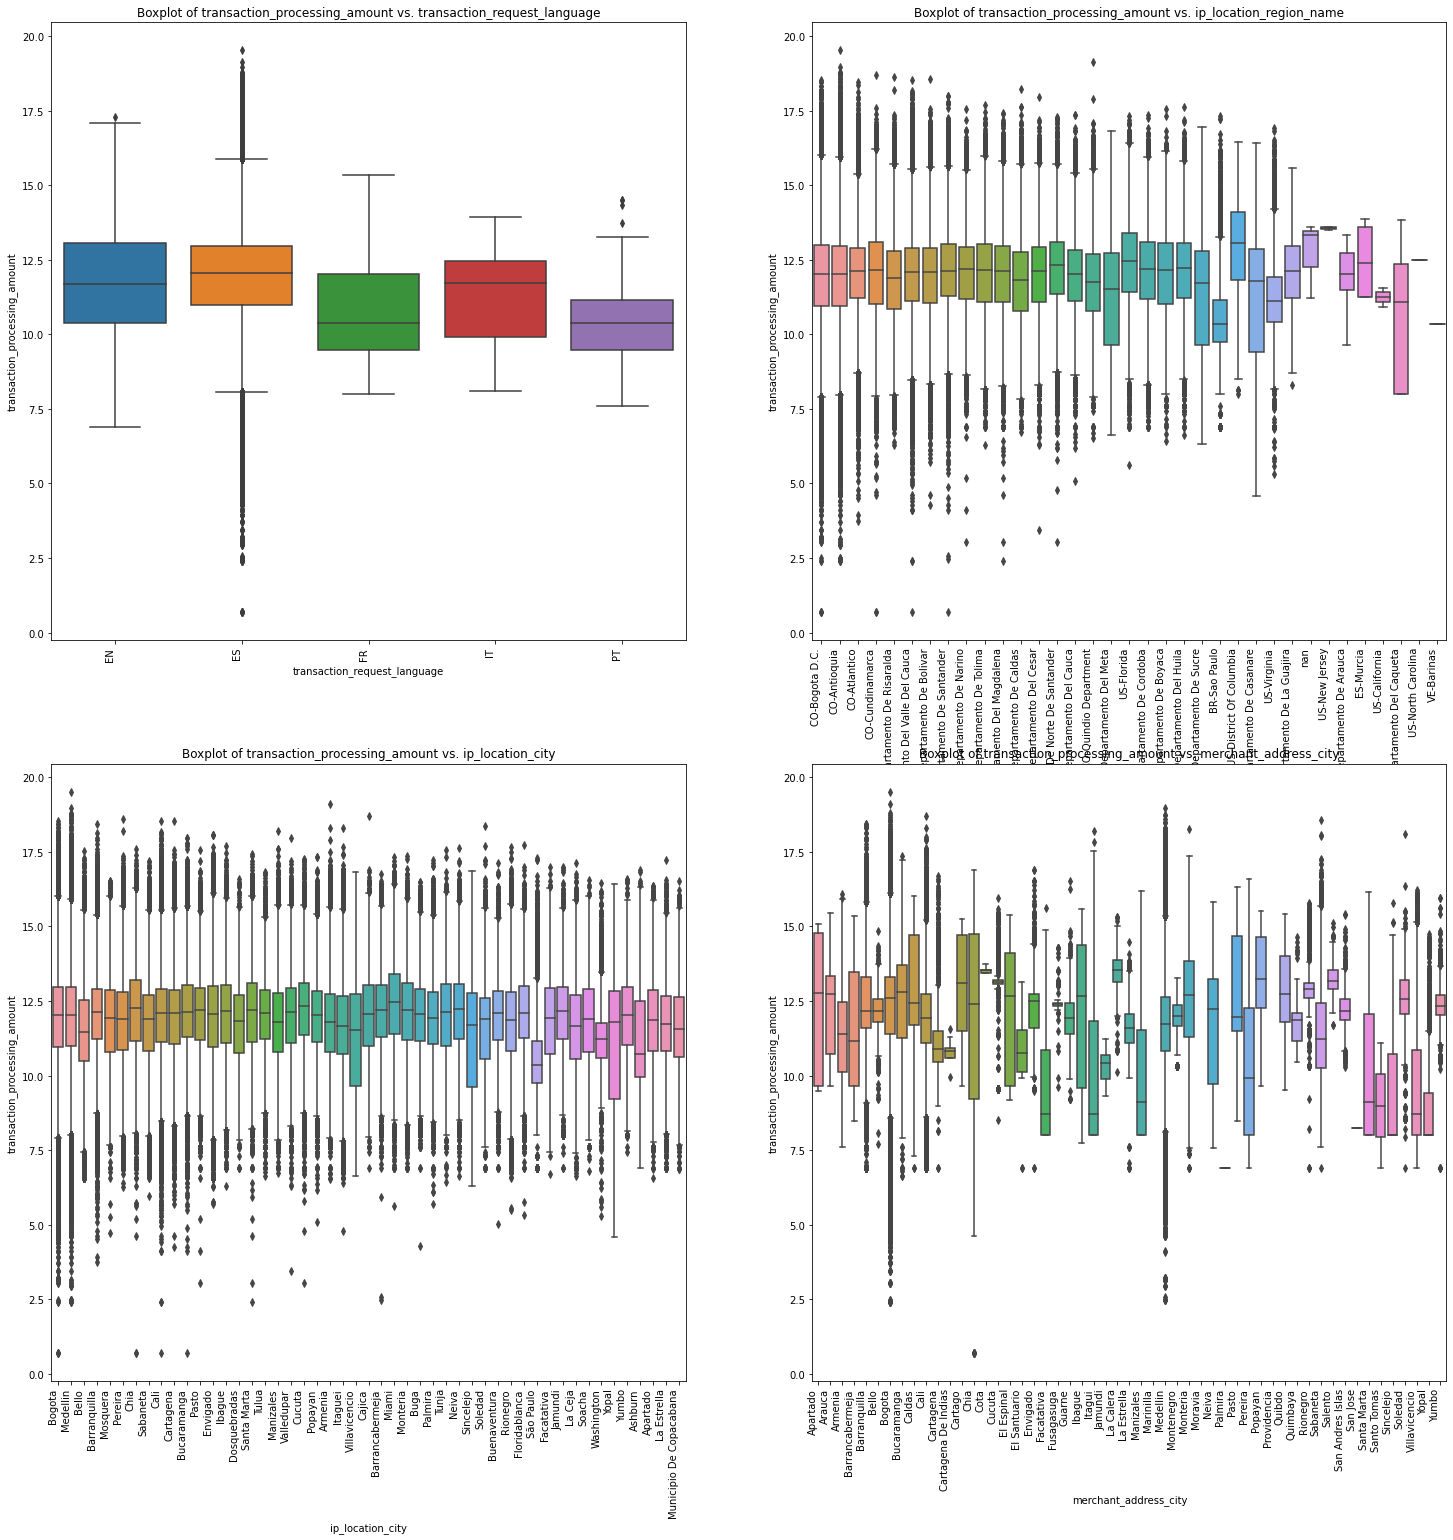

In [ ]:
plt.figure(figsize=(25,25))
vars_to_plot = ['transaction_request_language', 'ip_location_region_name', 'ip_location_city', 'merchant_address_city']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = var, y='transaction_processing_amount', data = cityDF)
    title_string = "Boxplot of transaction_processing_amount vs. " + var
    plt.ylabel("transaction_processing_amount")
    plt.xticks(rotation=90, horizontalalignment='right')
    #fig.set_xticklabels(fig.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.title(title_string)

In [ ]:
sns.scatterplot()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 <a list of 53 Text major ticklabel objects>)

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



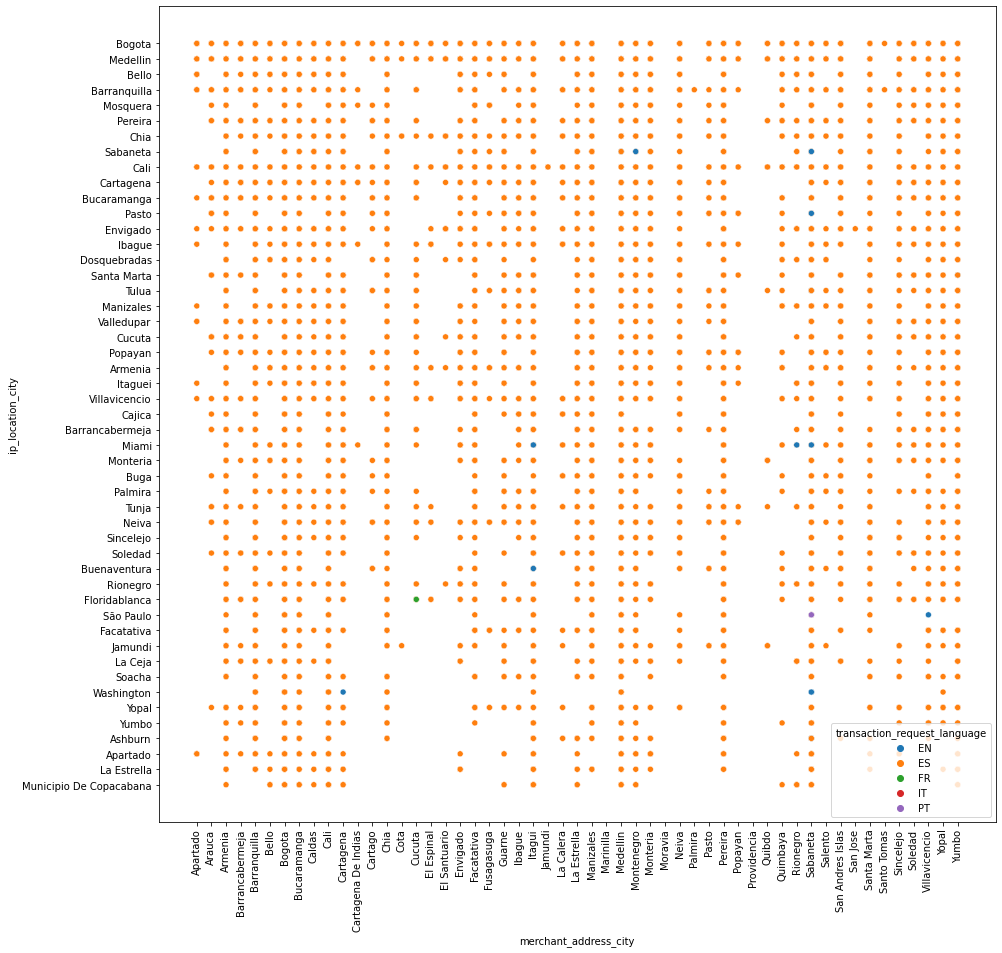

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='merchant_address_city', y='ip_location_city', hue='transaction_request_language', 
                style=None, size=None, data=cityDF,
                palette=None, hue_order=None, hue_norm=None,
                sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, 
                x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, 
                alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None)
plt.xticks(rotation=90)

## Correlation Matrix

### Between numerical variables

transaction hour vs transacion installment and the process amount

We compute the correlation of transaction hour vs transacion installment and the process amount

In [ ]:
Corr_matrix = bd[['transaction_processing_hour','transaction_card_installments','transaction_processing_amount']].corr()
Corr_matrix

transaction_processing_hour  ...  transaction_processing_amount
transaction_processing_hour                       1.000000  ...                      -0.002254
transaction_card_installments                     0.055338  ...                       0.097908
transaction_processing_amount                    -0.002254  ...                       1.000000

[3 rows x 3 columns]

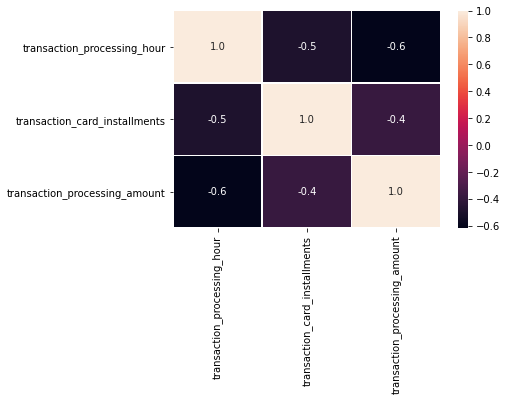

In [ ]:
# Here is the matrix for the numeric variables.

f,ax = plt.subplots()
sns.heatmap(Corr_matrix.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


### Between categorical and numerical variables

(Statistics Fundamentals bootcamp)

https://stackoverflow.com/questions/44694228/how-to-check-for-correlation-among-continuous-and-categorical-variables-in-pytho

https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365





In [ ]:
#np.corrcoef(df)
np.corrcoef(cityDF['transaction_card_installments'], cityDF['card_class'])

array([[ nan,  nan],
       [ nan,  nan]])

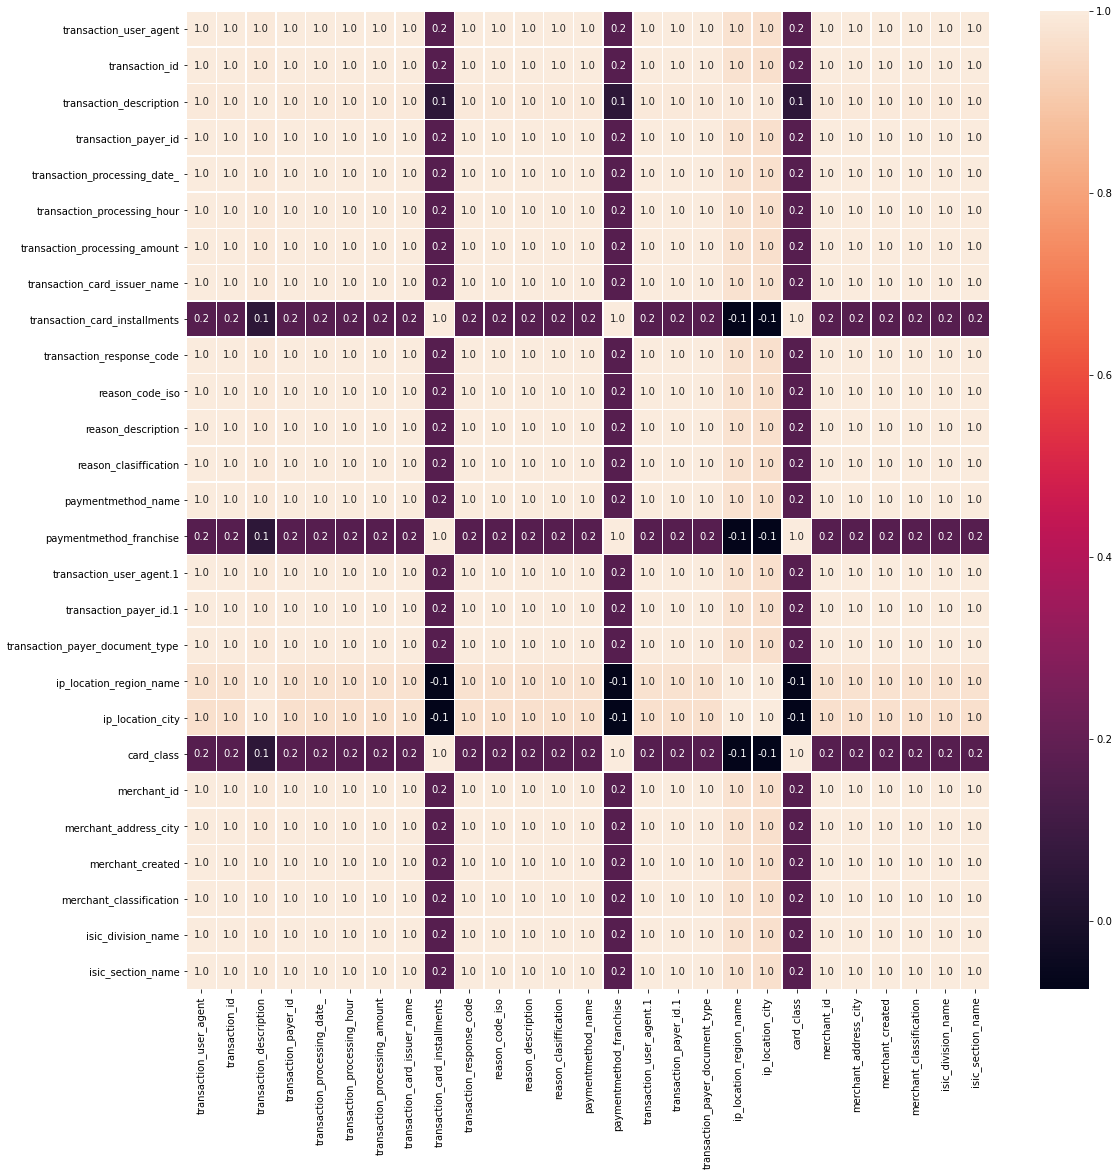

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(d4.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()
hide_toggle()


### Between categorical variables

In [ ]:
cityDF.columns

Index(['transaction_user_agent', 'transaction_id', 'transaction_description',
       'transaction_processing_date_', 'transaction_processing_hour',
       'transaction_request_language', 'transaction_payer_id',
       'transaction_payer_document_type', 'transaction_processing_amount',
       'transaction_card_issuer_name', 'transaction_card_type',
       'transaction_card_installments', 'transaction_response_code', 'site_id',
       'site_channel', 'site_category', 'merchant_id', 'merchant_enabled',
       'merchant_address_city', 'merchant_created', 'merchant_classification',
       'ip_location_region_name', 'ip_location_city', 'card_id',
       'card_issuer_country', 'card_class', 'card_country',
       'paymentmethod_name', 'paymentmethod_franchise', 'paymentmethod_type',
       'isic_division_name', 'isic_section_name', 'weekday', 'week', 'month',
       'year'],
      dtype='object')

In [ ]:
[x for x in bd.columns if x not in All_cols]

['card_issuer_country']

In [ ]:
cols_to_drop = ['transaction_response_code', 'transaction_card_type', 'paymentmethod_type', 
 'paymentmethod_franchise', 'card_class', 'card_issuer_country', 'card_country',
 'transaction_card_issuer_name', 'transaction_processing_hour']

In [ ]:
cityDF.drop(columns = ['transaction_response_code', 'card_issuer_country', 'card_country',
                       'transaction_card_issuer_name', 'transaction_processing_hour',
                       'card_id', 'ip_location_city', 'ip_location_region_name', 'merchant_created', 'merchant_id',
                       'site_id', 'transaction_description', 'transaction_user_agent', 'transaction_id',
                       'transaction_processing_date_','transaction_payer_id', 
                       'weekday', 'week', 'month', 'year'], inplace = True)
cityDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5499984 entries, 9601684 to 4762202
Data columns (total 16 columns):
 #   Column                           Dtype   
---  ------                           -----   
 0   transaction_request_language     category
 1   transaction_payer_document_type  category
 2   transaction_processing_amount    float64 
 3   transaction_card_type            category
 4   transaction_card_installments    float64 
 5   site_channel                     category
 6   site_category                    category
 7   merchant_enabled                 category
 8   merchant_address_city            category
 9   merchant_classification          category
 10  card_class                       category
 11  paymentmethod_name               category
 12  paymentmethod_franchise          category
 13  paymentmethod_type               category
 14  isic_division_name               category
 15  isic_section_name                category
dtypes: category(14), float64(2)
me

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#pip install phik==0.10.0
import phik
Phi_Corr_matrix = cityDF.phik_matrix()

interval columns not set, guessing: ['transaction_processing_amount', 'transaction_card_installments']


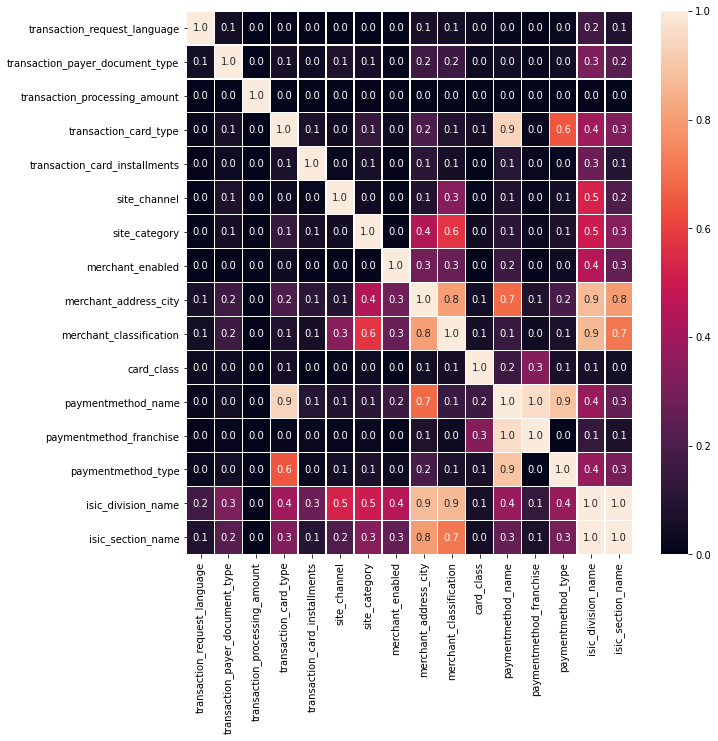

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(Phi_Corr_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
# Making of a Heatmap of correlations:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(Phi_Corr_matrix, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 19))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Phi_Corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Final Remarks

In this process we get a good idea of the data that we have.


As the data was dirty still, we used quantiles (Q1, median, Q3) to avoid the influence of outliers.


The main issue is having different types of users in the database: merchant users (buyers) and common users that consume and make purchases in very different ammounts and frequency. We have at the same time millions of transactions of low value, like cellphone recharges, lottery tickets, samples of products, or small payments of dividends. And this is mixed with sparse transactions of university fees, large purchases of equipment and other transactions in the range of hundreds of millions of pesos. 



This make the variable transaction_amount range from one dollar to 10 orders of magnitude. It happens something similar with the number of transactions. 



For this, we are suspecting that we have to identify the high value and high transactional users (companies) One way is by the number of transactions, amount of transactions, frequency of transactions, type of document (NIT, RUT, TaxID, etc)

---
We are working under the following assumptions:
* The transaction_payer_id variable identifies one user for each value. 
* The transaction_payer_card_id also codifies a single card.
* When we are calculating similarity, we are supossing that the similarity is simetrical
* The data is still dirty in the sense that comes from different types of business models and can be mixed with test transactions still.


---


This last EDA is still in process due to all the cleaning we had to make to this Database. We will have to made it again and again with different segmentations of the data.


The next step is answering this research questions:

1. How does the number of purchases per payer behave?
2. How does the purchase value per payer behave?
3. How does the number of different merchants in which a payer has bought behave?
4. How does the number of different merchant classifications behave in which a payer has bought?
5. How does the number of purchases per merchant behave?
6. How does the value of sales per merchant behave?
7. How does the number of different customers who have bought from a merchant behave?
8. Is it there a different behavior between high amount users and low ammount users?
9. Is there esentially the same behavior through all users in different segmentation of merchants?
10. Which variable is more relevant? Transaction Amount or Number of Transactions?